<h1 align="center">MSIN0097: Predictive Analytics</h1>
<h1 align="center">Individual Assignment</h1>
<h1 align="center">Predicting NFT Prices</h1>
<br><br>
<h3 align="center"> Copy &7 paste the Google Colab link for the Notebook file: https://drive.google.com/file/d/1wMnYS6Zd-TSClglZnpa6s87vKhDqcJPV/view?usp=sharing </h3>

# Table of Contents

* [Chapter 1](#chapter1): Framing the problem
* [Chapter 2](#chapter2): Exploratory data analysis

* [Chapter 3](#chapter3): Data cleaning
    * [3.1](#3_1): Dataframe sorting
    * [3.2](#3_2): Dealing with outliers
    * [3.3](#3_3): Label encoding

* [Chapter 4](#chapter4): Correlation between attributes

* [Chapter 5](#chapter5): Preprocessing
    * [5.1](#5_1): Generating artwork counts
    * [5.2](#5_2): Feature scaling
    * [5.3](#5_3): Generating price classes
    * [5.4](#5_4): Data splitting

* [Chapter 6](#chapter6): Model selection and training
    * [6.1](#6_1): Logistic regression
    * [6.2](#6_2): KNeighbors classifier
    * [6.3](#6_3): Decision tree
    * [6.4](#6_4): Random forest classifier
    * [6.5](#6_5): XGMBoost
    * [6.6](#6_6): SVM
    * [6.7](#6_7): Models comparison

* [Chapter 7](#chapter7): Cross-validation

* [Chapter 8](#chapter8): Fine-tuning
    * [8.1](#8_1): Hyperparameters
    * [8.4](#8_4): Ensemble

* [Chapter 9](#chapter9): Further work
* [Chapter 10](#chapter10): Conclusion
* [Chapter 11](#chapter11): References
* [Chapter 12](#chapter12): Word count

# Report

## Notebook Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Essentials
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import numpy as np; np.random.seed(2022)
import random

#Image creation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

#Image display
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image as image
from IPython.display import display

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

#Metrics of accuracy
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std

#Other
from nbformat import current
import itertools as it
import io
import os
import sys

/usr/local/lib/python3.7/dist-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


## Chapter 1: <a class="anchor" id="chapter1"></a> Framing the problem

NFTs are unique cryptographic tokens that exist on a blockchain and cannot be replicated. NFTs can be used to represent real-world items like artwork and real estate, being a big opportunity for digital artists in particular. (Sharma, 2021) The main assumption in the project is that the NFT’s price was set by the creator, not NFT Showroom or any other entity, as it is made on other NFT trading web-spaces.

The business problem I am trying to solve is the volatility and current unjustification of NFT prices. I am trying to see a pattern in pricing and predict into which price category will a certain NFT fall. Although the dataset has continuous variables for price per each NFT, I framed the problem to be a classification problem exactly due to this uncertainty around the newly emerging market. Before setting a price for an item, you need to know the range  - which digital artists struggle to identify, based on their artwork. That is the business problem this project tries to solve. More details are seen in Machine Learning Canvas below.


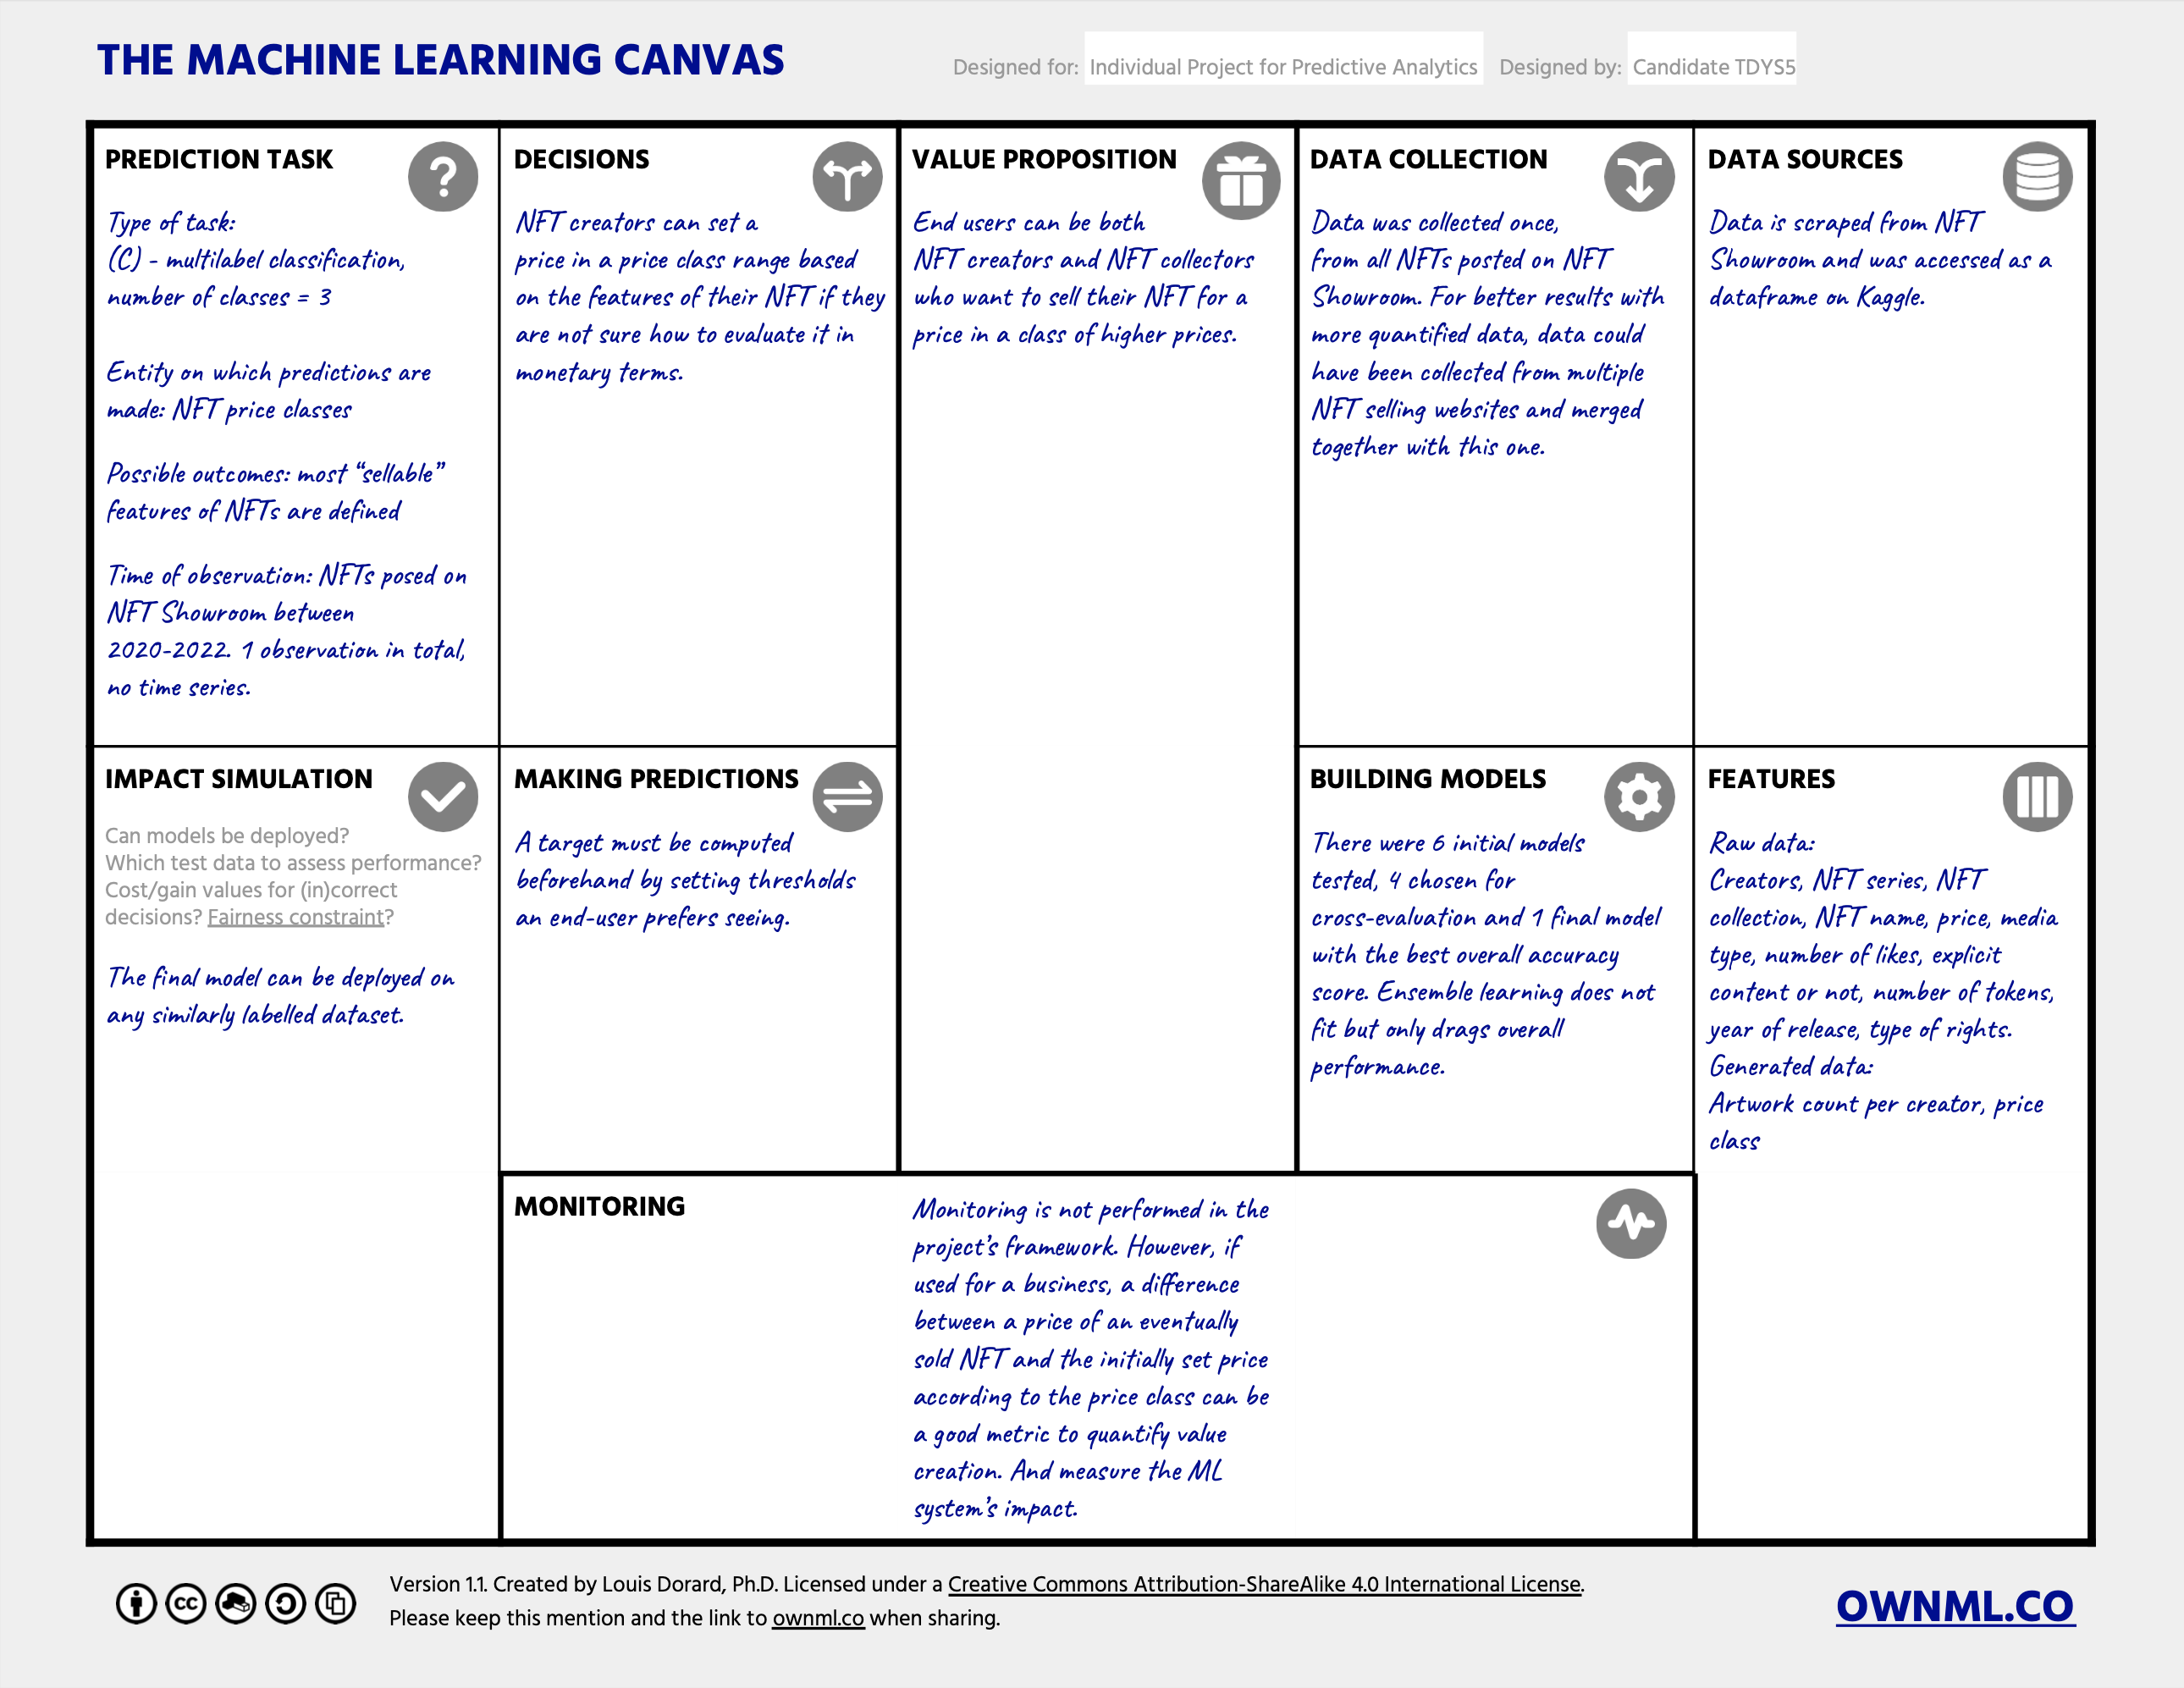

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/Predictive/images/ml_canvas.png'))

The report will cover the following process:
* importing and cleaning the Kaggle data which was aggregated from NFT Showroom;
* EDA before (chapter 2) and after dealing with outliers (chapter 4);
* preprocessing and splitting data;
* building and comparing models;
* performing cross-validation on best half of them;
* fine-tuning hyperparameters on the best one.

## Chapter 2: <a class="anchor" id="chapter2"></a> Exploratory data analysis

Let’s convert the data to a format we can easily manipulate (without changing the data itself yet). We’ll lean the dataset leaving only relevant columns for faster perception before visualising relationships between variables we are most interested in.

In [ ]:
#full_df = pd.read_csv('dataset.csv') #local or Faculty
full_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predictive/dataset.csv') #Google Colab
full_df.head()

title                  name         creator  \
0     30 min Drawings            Giant Frog      kristyglas   
1  Experimental Video          Biospecimens  juliakponsford   
2            Sexy Art             long legs         badsexy   
3         Dream World  A Guide in my Dreams         yoslehz   
4         Dream World       Silent Observer         yoslehz   

                                       art_series  price     symbol   type  \
0           kristyglas_30-min-drawings_giant-frog   50.0  SWAP.HIVE  PHOTO   
1  juliakponsford_experimental-video_biospecimens  500.0  SWAP.HIVE  VIDEO   
2                      badsexy_sexy-art_long-legs   10.0  SWAP.HIVE  PHOTO   
3        yoslehz_dream-world_a-guide-in-my-dreams   20.0  SWAP.HIVE  PHOTO   
4             yoslehz_dream-world_silent-observer   20.0  SWAP.HIVE    GIF   

   likes   nsfw  tokens  year  rights  royalty  \
0      2  False      30  2020       1        0   
1      0  False       1  2020       1        0   
2      0   True       2  2021       1        0   
3      1  False       2  2020       1        0   
4      0  False       2  2020       1        0   

                                              cid  \
0  QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH   
1  QmeN4KuTQwHPWvGDhiopNJziqmf1feGeabDD4Gk7z9DgUL   
2  QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4   
3  QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN   
4  Qmb8WbXXdorG52sgY4mSyYUjevE65SGa2vhSxdXstfinz1   

                                                path  
0  ./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...  
1  ./dataset/video/QmeN4KuTQwHPWvGDhiopNJziqmf1fe...  
2  ./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...  
3  ./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...  
4  ./dataset/gif/Qmb8WbXXdorG52sgY4mSyYUjevE65SGa...

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       4189 non-null   object 
 1   name        4189 non-null   object 
 2   creator     4189 non-null   object 
 3   art_series  4189 non-null   object 
 4   price       4189 non-null   float64
 5   symbol      4189 non-null   object 
 6   type        4189 non-null   object 
 7   likes       4189 non-null   int64  
 8   nsfw        4189 non-null   bool   
 9   tokens      4189 non-null   int64  
 10  year        4189 non-null   int64  
 11  rights      4189 non-null   int64  
 12  royalty     4189 non-null   int64  
 13  cid         4189 non-null   object 
 14  path        4189 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 462.4+ KB


We first looked into the types of features of the training dataset. The cell below shows that the whole dataset has 8 categorical features and 7 numeric variables, including a boolean for the "nsfw" column.

In [ ]:
print(full_df.dtypes.astype(str).value_counts())

object     8
int64      5
float64    1
bool       1
dtype: int64


Based on the variable description data below, I found the following relationships most interesting to explore:
* price vs tokens (assumption: 1 token = 1 edition, can be sold or available, i.e. 1 token ≠ 1 sale)
* year vs price
* NFT types by media (type)
* NFT types by explicit content (nsfw)

In [ ]:
# Iniitial data observation
variable_description_table = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Predictive/variables_description.xlsx')
variable_description_table

variable              type of data  \
0    title      qualitative: nominal   
1     name      qualitative: nominal   
2  creator      qualitative: nominal   
3    price  quantitative: continuous   
4     type      qualitative: nominal   
5    likes    quantitative: discrete   
6     nsfw      quantitative: binary   
7   tokens    quantitative: discrete   
8     year    quantitative: discrete   
9   rights      quantitative: binary   

                                         description  
0                                    collection name  
1                                       artwork name  
2                      creator's tag on NFT Showroom  
3               price of NFT in Hives set by creator  
4                   media type (image / gif / video)  
5                    number of likes on NFT Showroom  
6    not safe for work, i.e. explicit content or not  
7        pegged units to purchase one edition of art  
8                 year of NFT release set by creator  
9  type of rights: "Private" or "Limited Reproduc...

In [ ]:
full_df.describe()

price        likes       tokens         year       rights  \
count  4.189000e+03  4189.000000  4189.000000  4189.000000  4189.000000   
mean   2.006903e+03     0.480783     4.162091  2018.009071     1.610169   
std    5.898135e+04     0.935313     9.319016    60.146922     0.920997   
min    2.500000e+00     0.000000     1.000000     1.000000     1.000000   
25%    3.000000e+01     0.000000     1.000000  2020.000000     1.000000   
50%    6.000000e+01     0.000000     3.000000  2020.000000     1.000000   
75%    1.500000e+02     1.000000     5.000000  2021.000000     3.000000   
max    2.744850e+06    10.000000   500.000000  2578.000000     3.000000   

       royalty  
count   4189.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

As we can see from the summary table above, there are no null values, as the count throughout all columns is 4189. However, there is a big gap between the minimum and maximum price, distorting the general distribution of prices. However, we can still see thatafer manually hiding  just 3 outliers in Tableau, prices are close to a Poisson distribution, skewed to the axis’ origin.

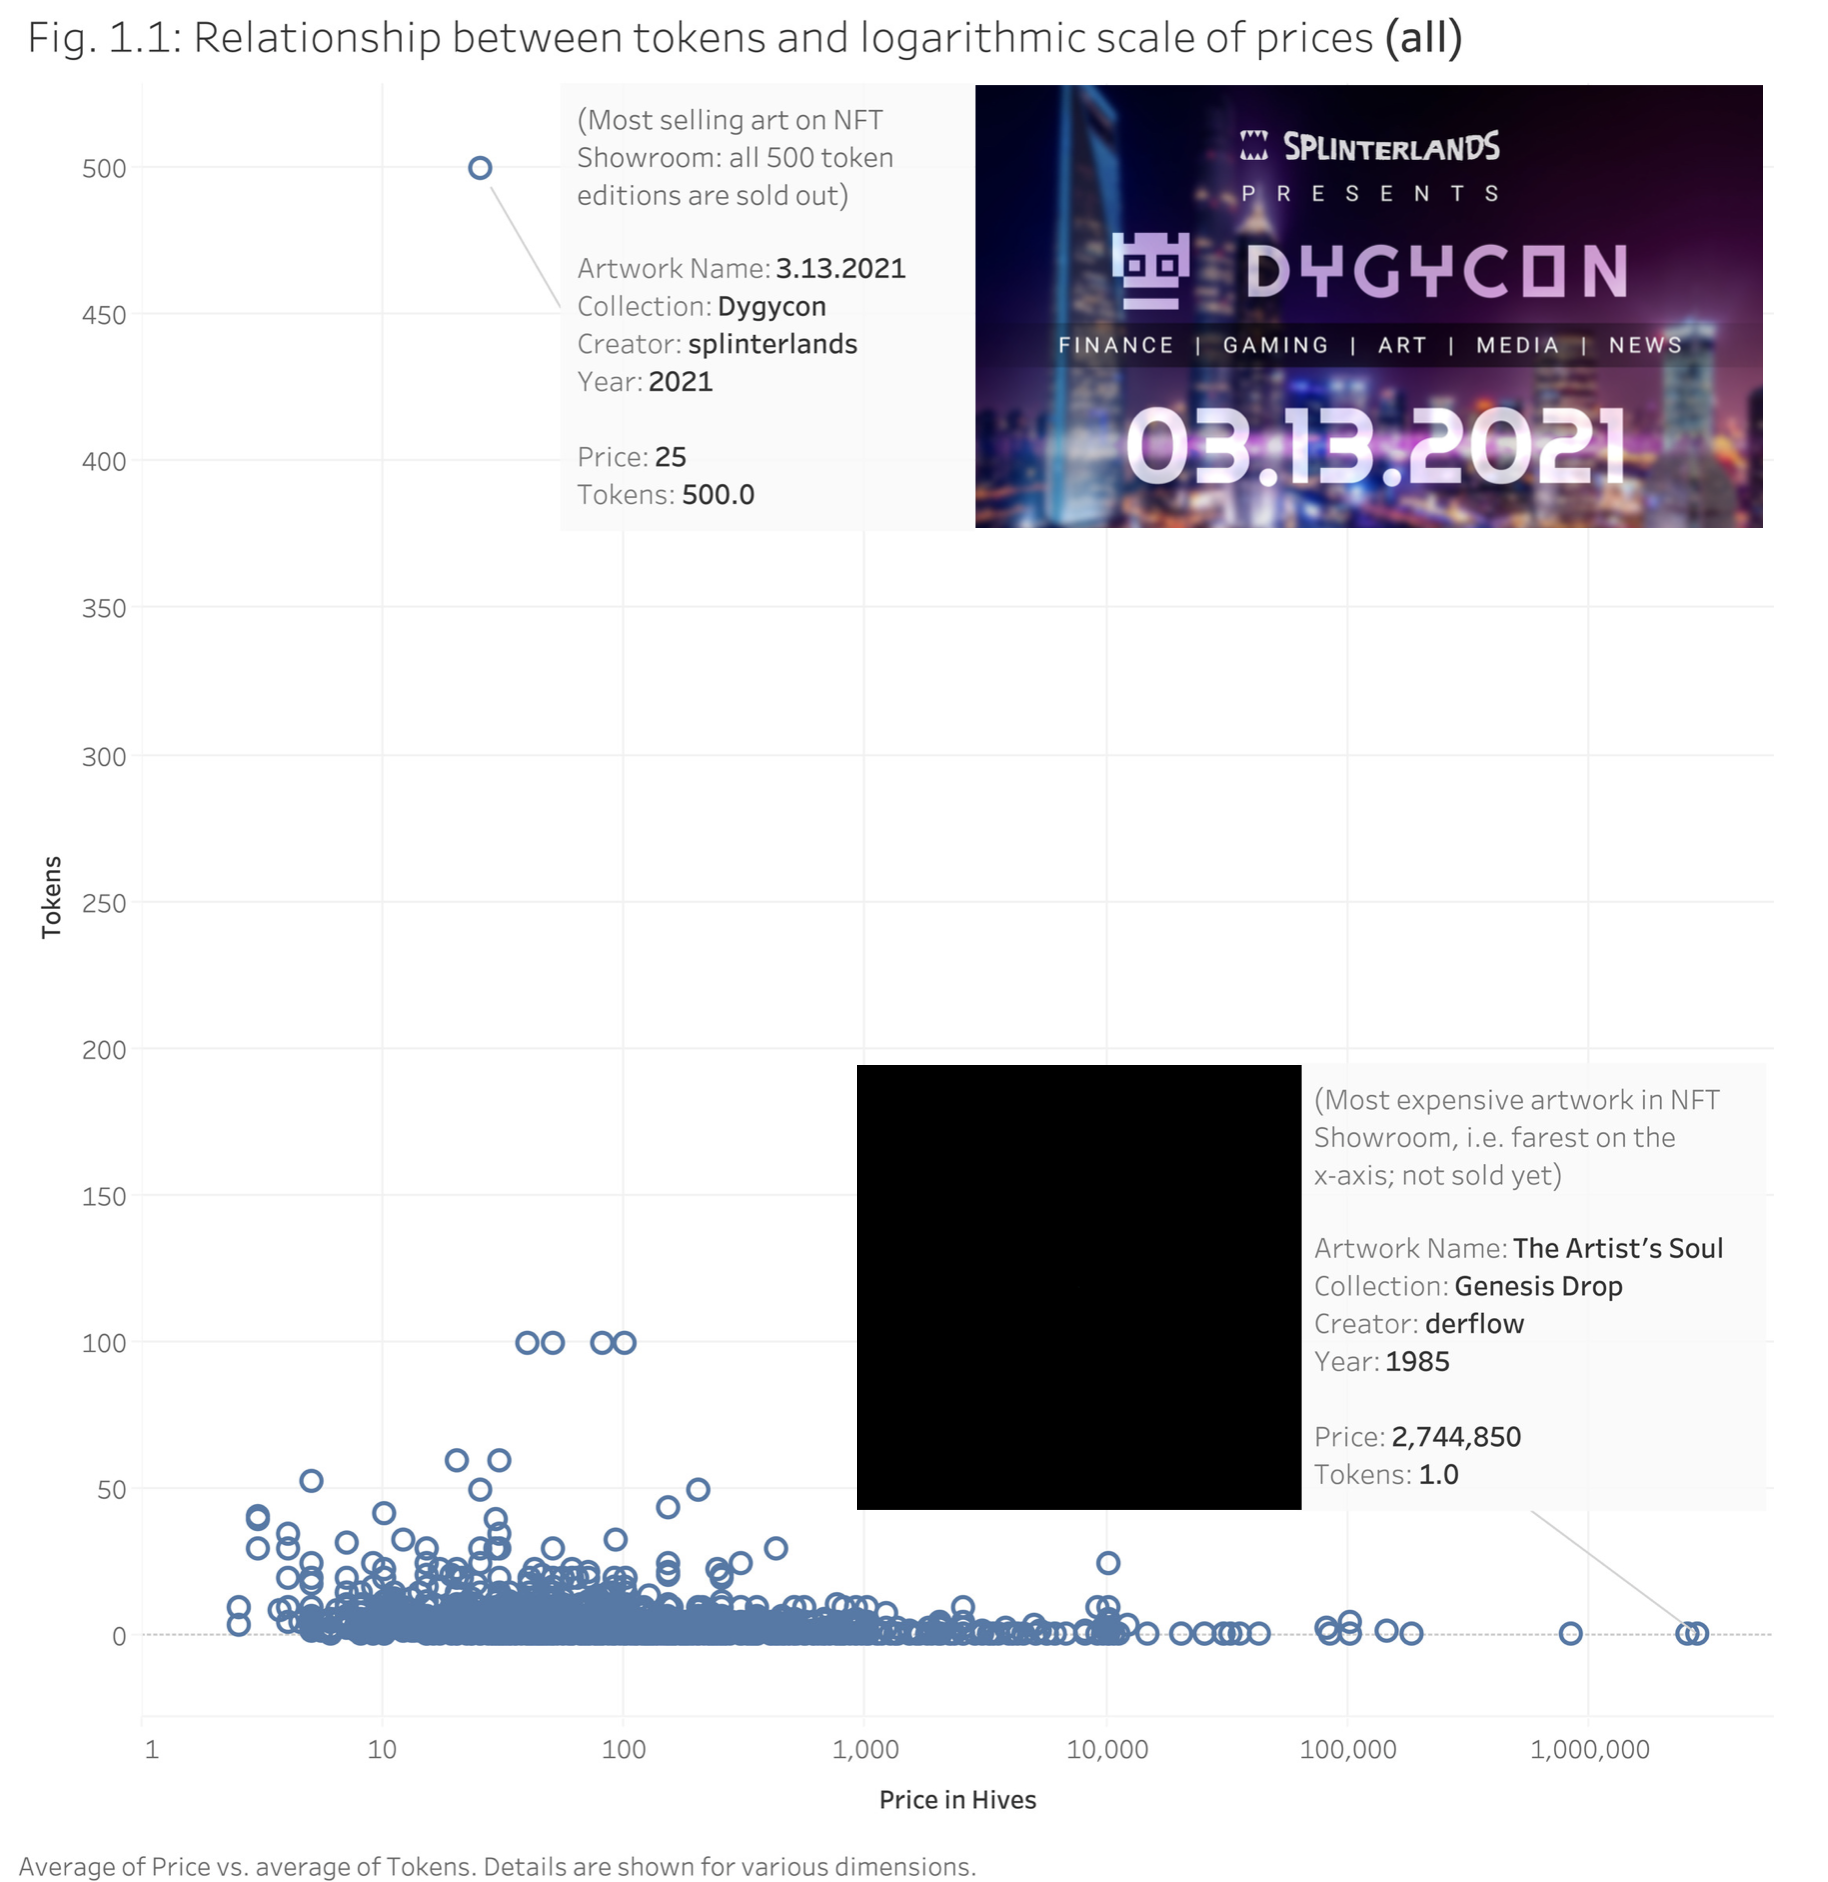

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/Predictive/images/all_price_tokens.png'))

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/Predictive/images/price_token_no_outliers.jpg'))

Output hidden; open in https://colab.research.google.com to view.

A treemap below shows a seemingly reverse relationship between *year* and *price*: the lower the year, the higher the price artists set. It mirrors traditional art: the older the painting, the more it is valued by collectors.

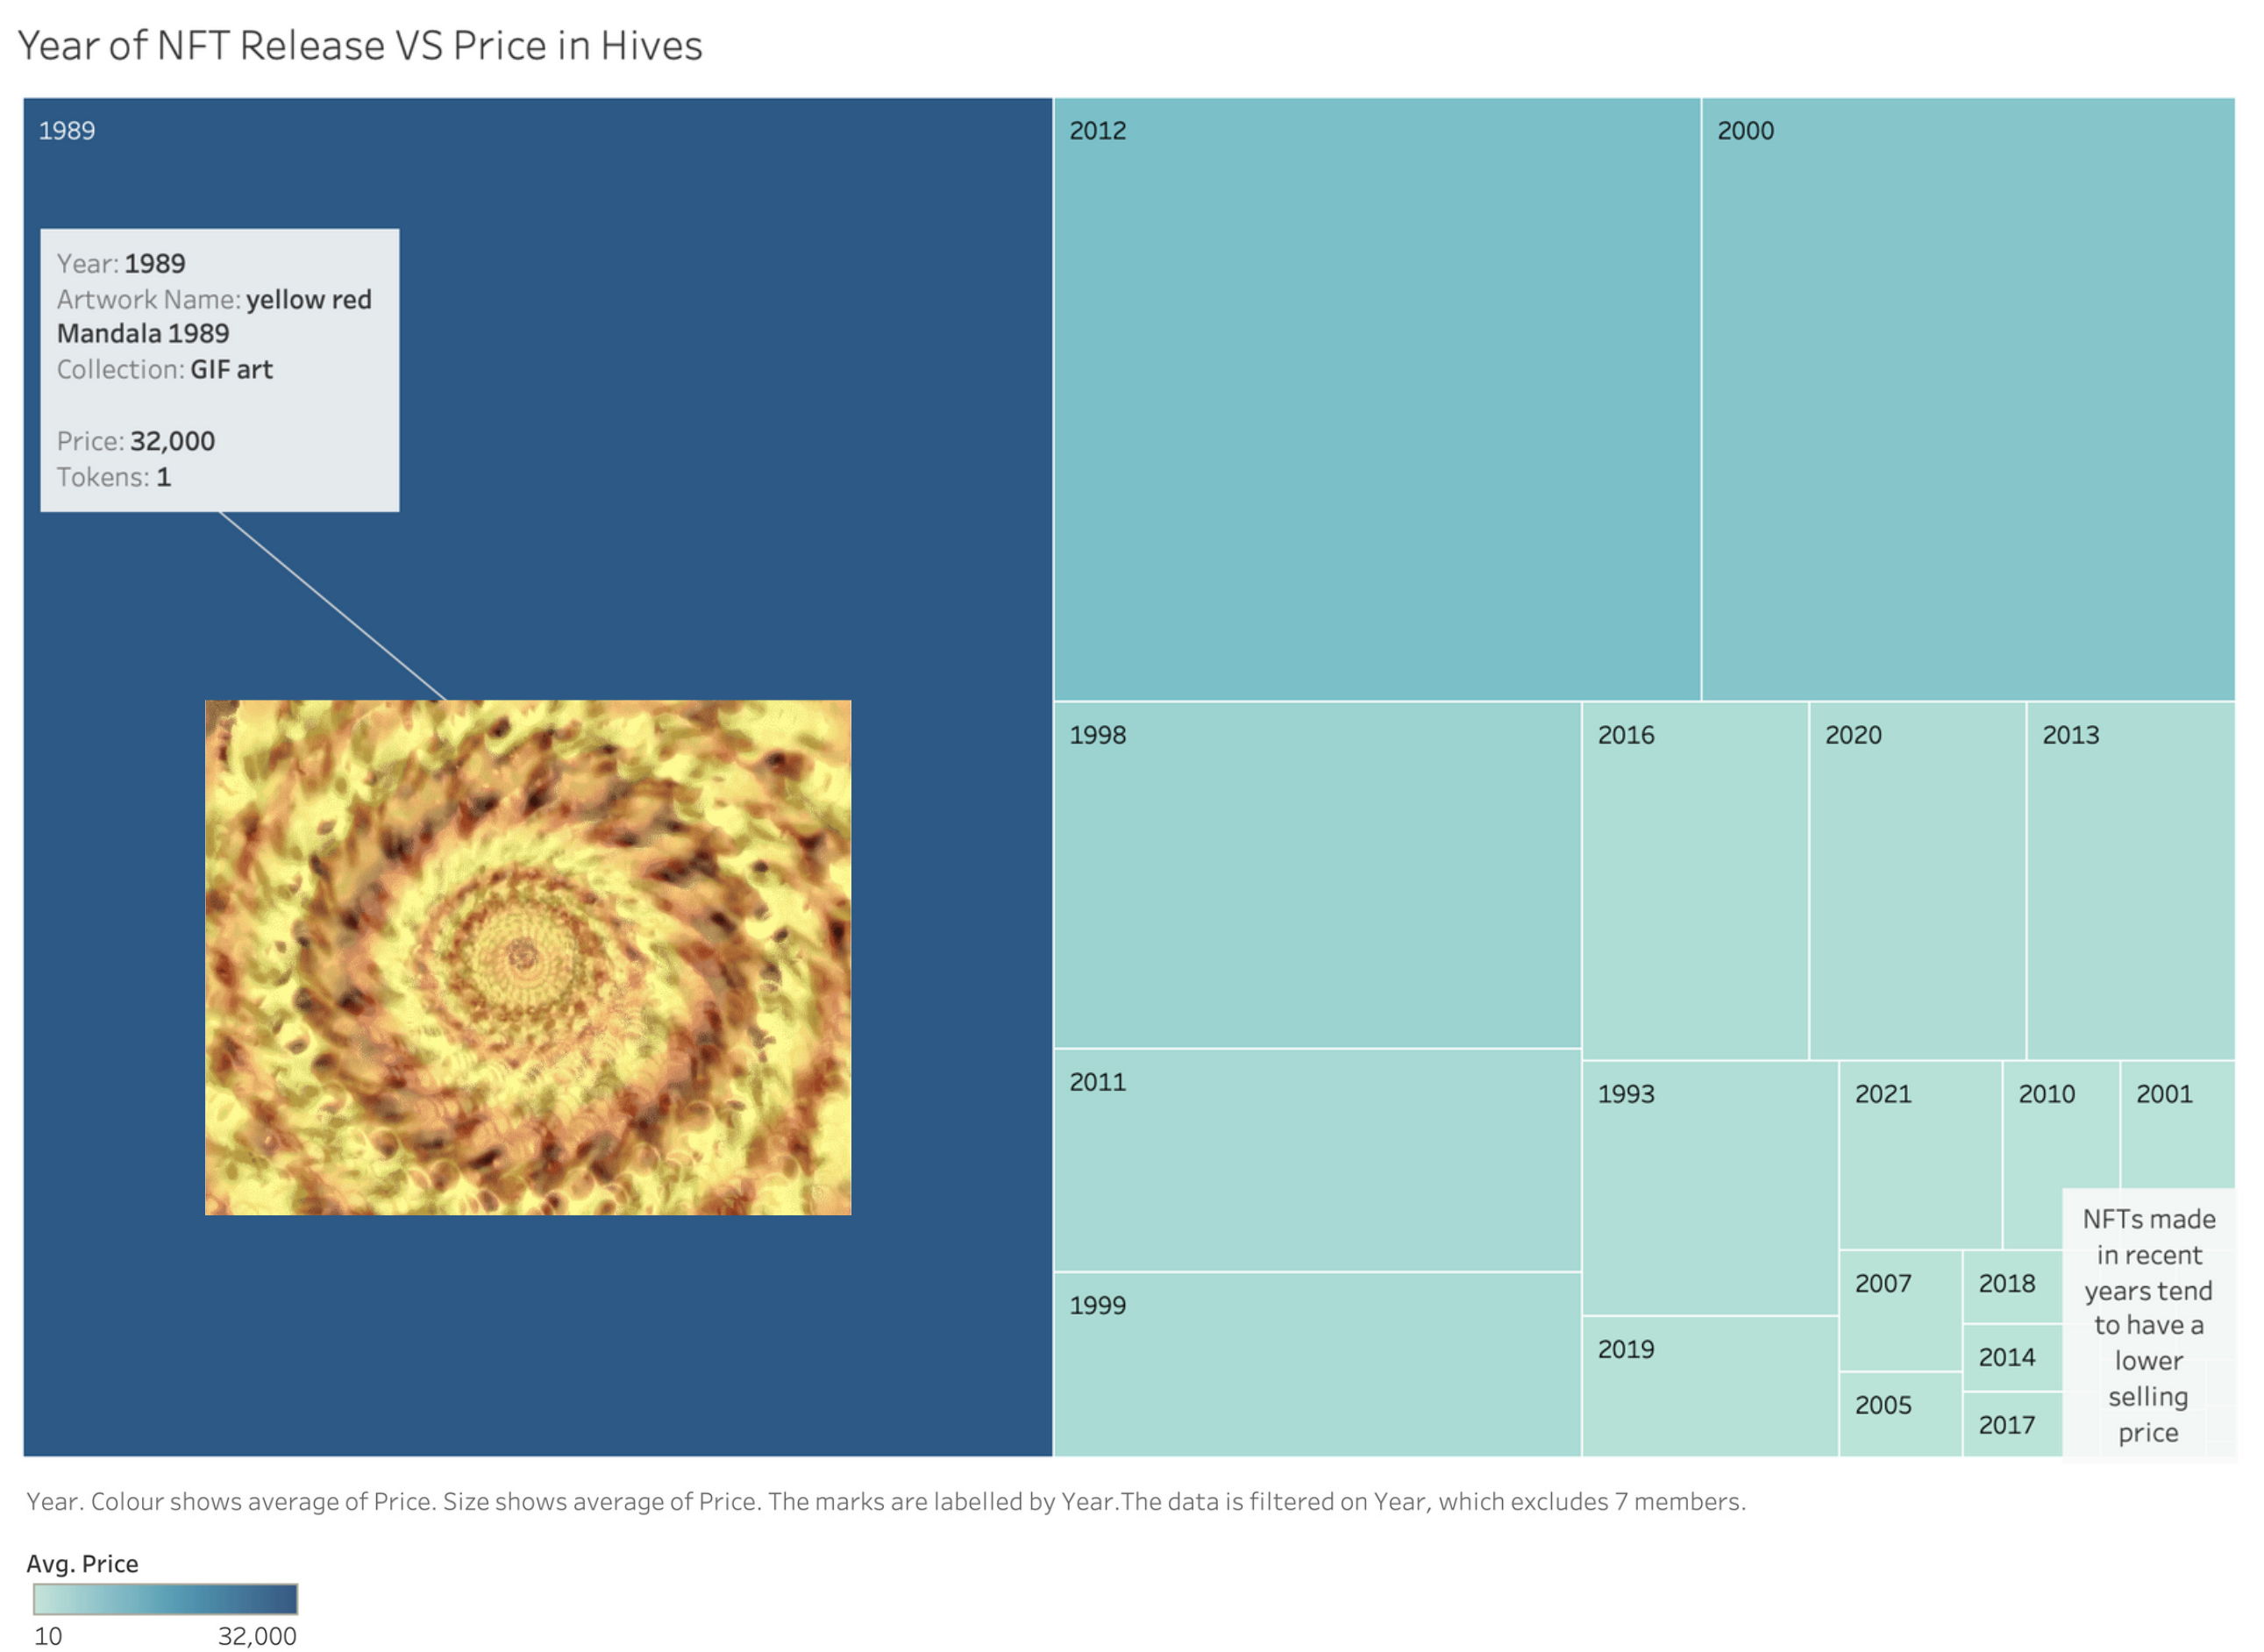

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/Predictive/images/year_vs_price.png'))

One may think that the trendier an item is, the higher price it should have. On a figure below, numbers represent worldwide search interest relative to the highest point on the chart. A value of 100 is the peak popularity for the term “NFT” and “nft”. A value of 50 means that the term is half as popular. A score of 0 means that there was not enough data for this term. Interestingly, the firstintrest peak was in March 2021 - right when the world shifted even more to the digital ecosystem due to Covid-19 restrictions. The peak of the graph is at January 2022, projected to have a relative fall by the end of February. Hence, higher NFT prices are not much influenced by the recent popularity in the topic.

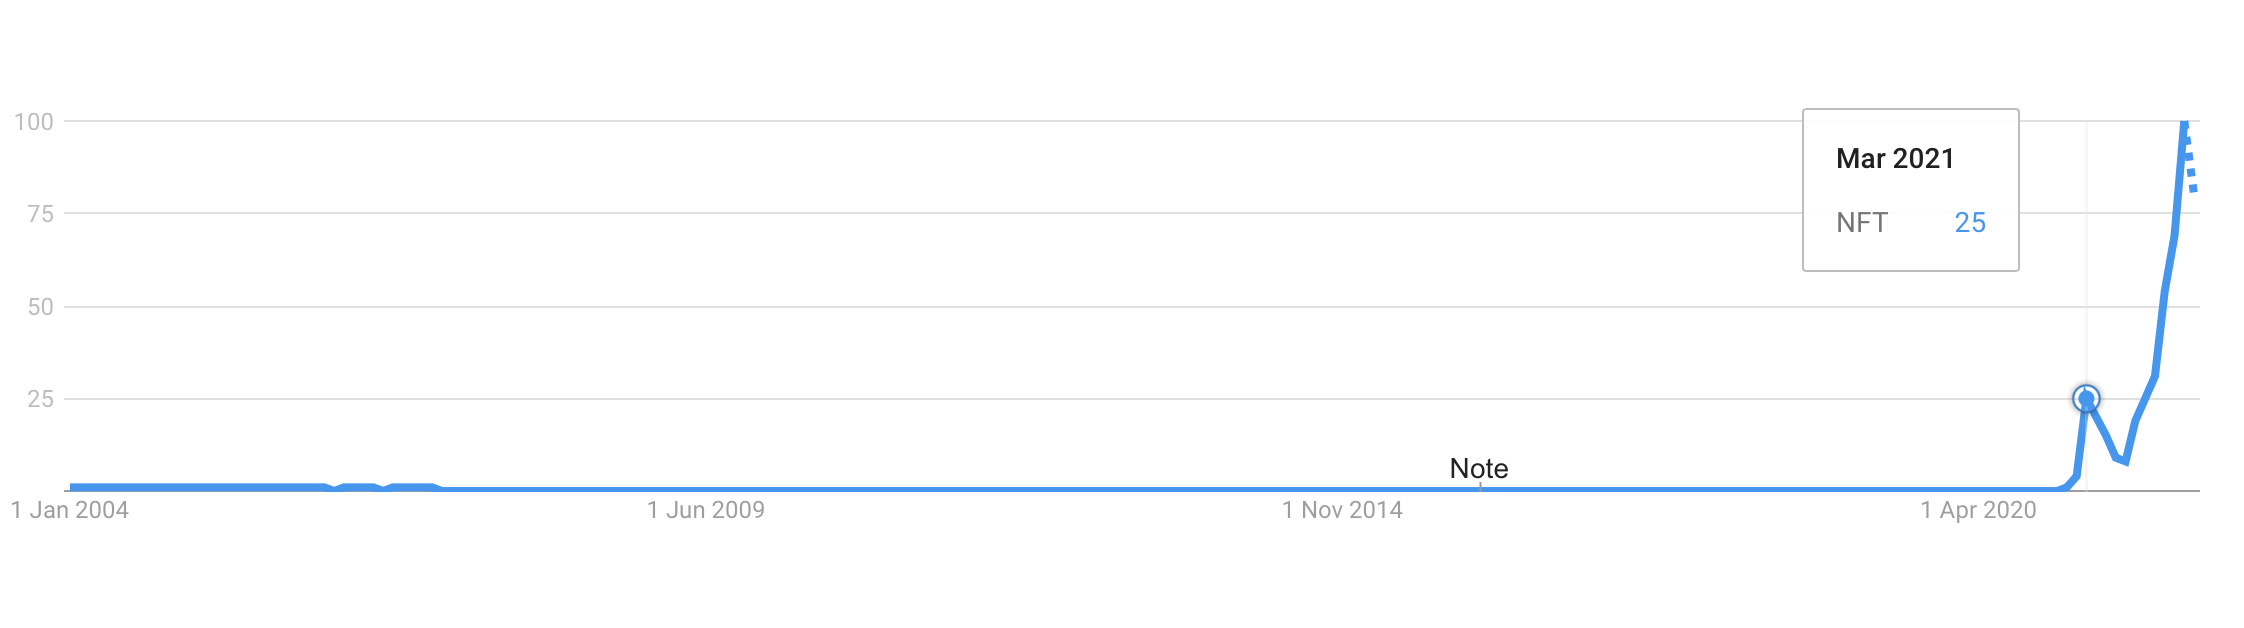

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/Predictive/images/google_trends.png'))

*Screenshot from Google Trends, showing interest in a Google search over time*


Image accounts for the majority of NFTs' media type.

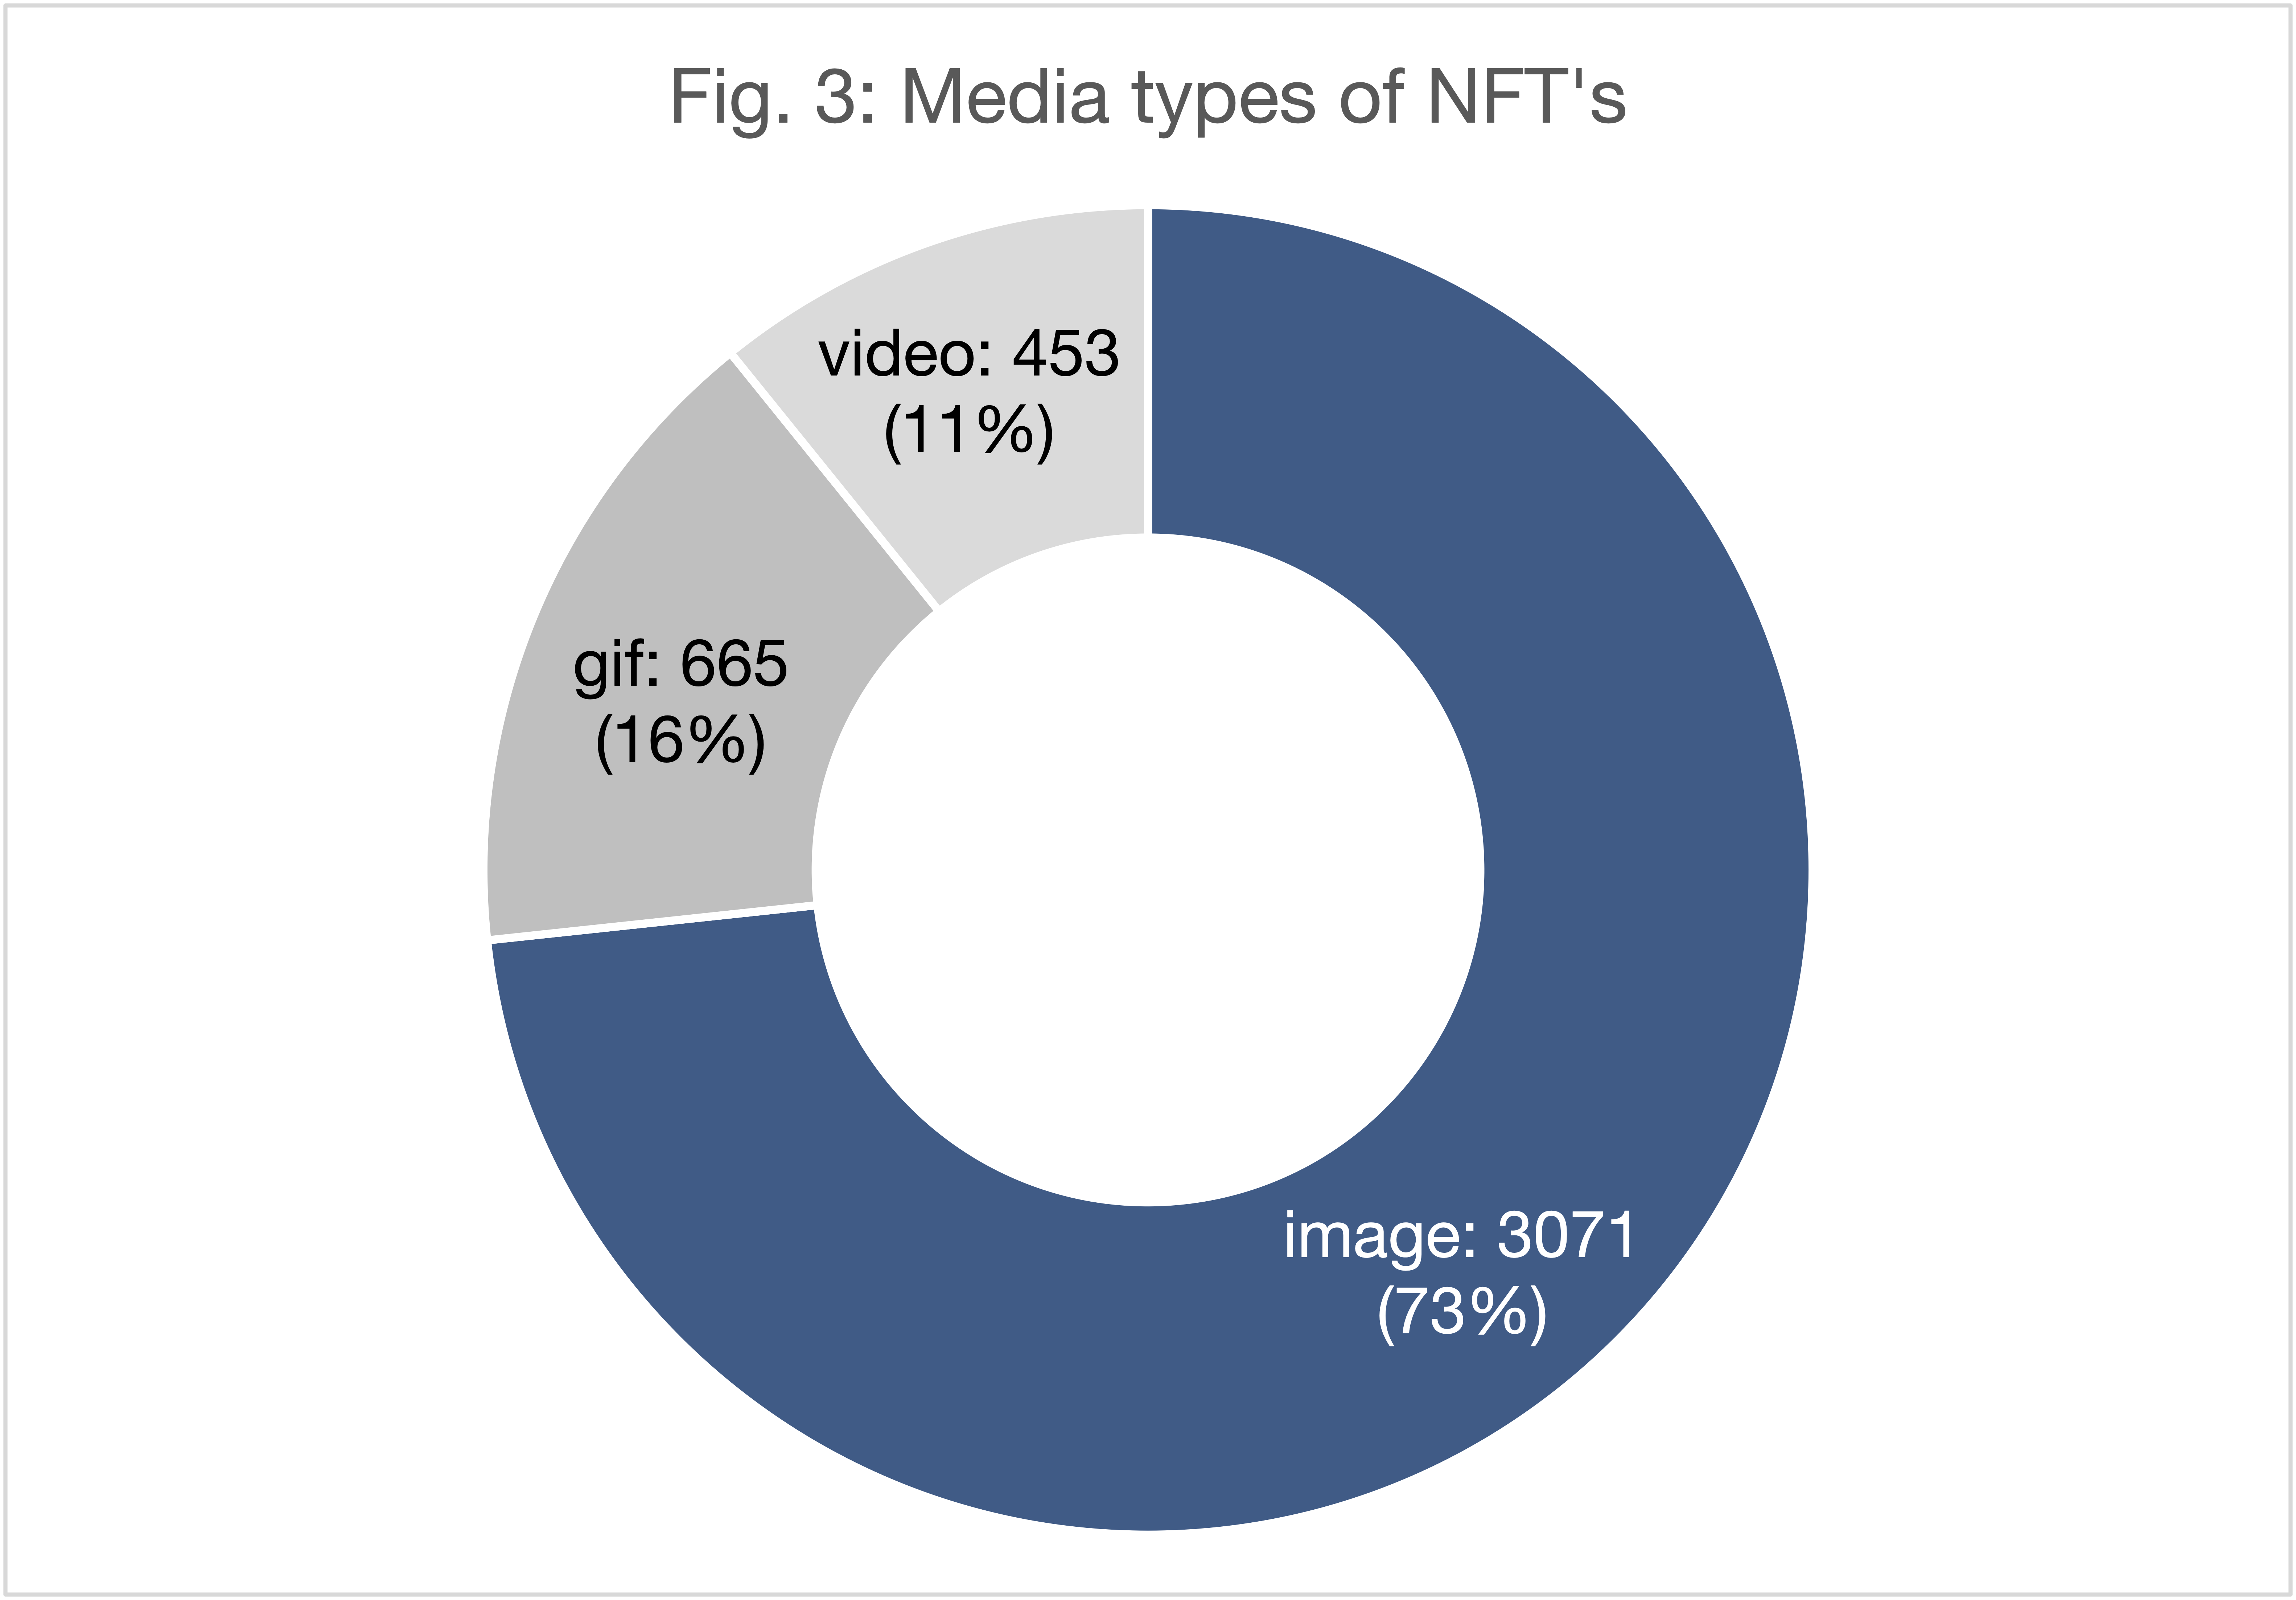

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/Predictive/images/media_types.png'))

97% of NFTs in the dataset are suitable for work (i.e. are not labelled as explicit by the creator). It is unlikely that with such a disproportion between 2 types an algorithm can pick up the relationship between explicit content and price, which one would expect to be proportional, i.e. NFTs with “True” in the “nsfw” column to be of a higher price, rather than one with “False”.

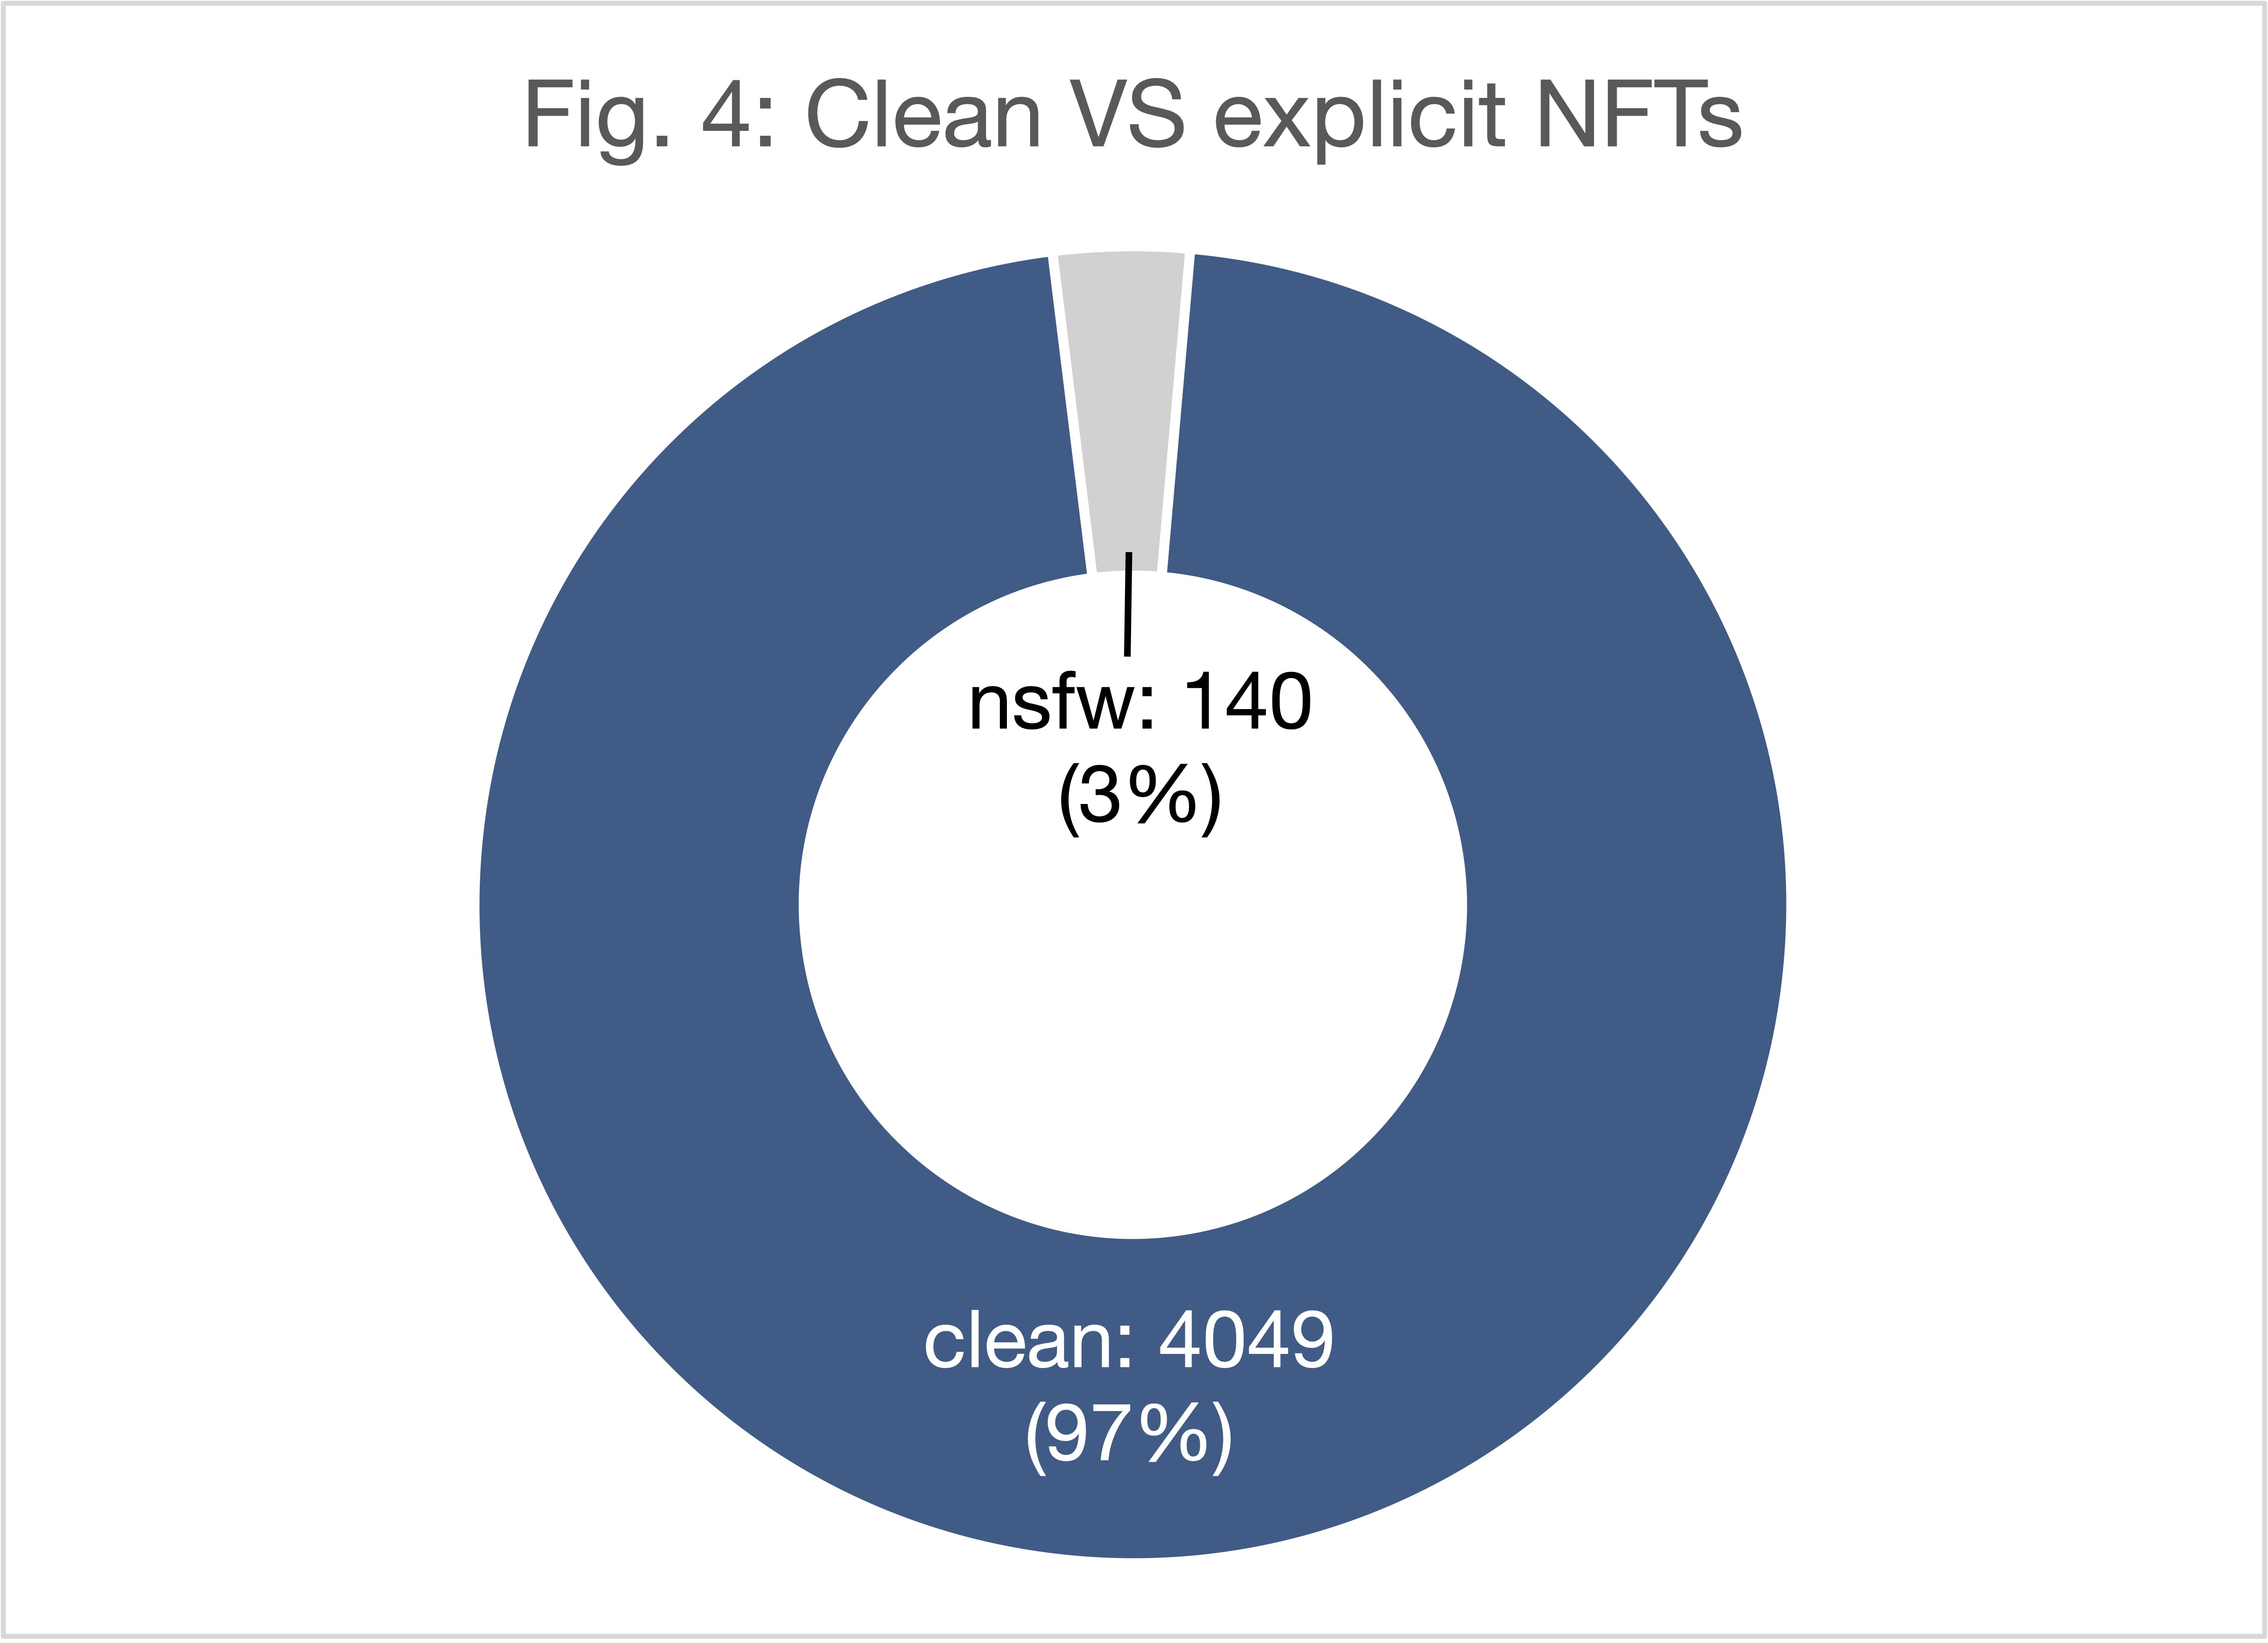

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/Predictive/images/nsfw.jpg'))

To conclude this chapter, the main feature properties we can extract are “year” and “tokens”. We will come back to the latter in chapter 4 after excluding outliers, so that we have a more explanatory correlation matrix, as without doing so, the matrix is pitch-black - having no correlated variables at all. Although it fits the real-world inconsistency and vague nature of NFTs at present, for he purpose of the project, we will do data cleaning before exploring feature properties further.

## Chapter 3: <a class="anchor" id="chapter3"></a> Data cleaning

### 3.1  <a class="anchor" id="3_1"></a> Dataframe sorting

In [ ]:
# Drop categorical columns that are with the same value throughtout the dataset (e.g. symbol, royalty) or unnecessary
df = full_df.drop(columns = ['cid', 'symbol', 'royalty'])
df.head()

title                  name         creator  \
0     30 min Drawings            Giant Frog      kristyglas   
1  Experimental Video          Biospecimens  juliakponsford   
2            Sexy Art             long legs         badsexy   
3         Dream World  A Guide in my Dreams         yoslehz   
4         Dream World       Silent Observer         yoslehz   

                                       art_series  price   type  likes   nsfw  \
0           kristyglas_30-min-drawings_giant-frog   50.0  PHOTO      2  False   
1  juliakponsford_experimental-video_biospecimens  500.0  VIDEO      0  False   
2                      badsexy_sexy-art_long-legs   10.0  PHOTO      0   True   
3        yoslehz_dream-world_a-guide-in-my-dreams   20.0  PHOTO      1  False   
4             yoslehz_dream-world_silent-observer   20.0    GIF      0  False   

   tokens  year  rights                                               path  
0      30  2020       1  ./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...  
1       1  2020       1  ./dataset/video/QmeN4KuTQwHPWvGDhiopNJziqmf1fe...  
2       2  2021       1  ./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...  
3       2  2020       1  ./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...  
4       2  2020       1  ./dataset/gif/Qmb8WbXXdorG52sgY4mSyYUjevE65SGa...

Let’s quantify columns “type” and “nsfw” for easier data synthesis.

In [ ]:
# Quantify columns
df['nsfw'].replace([True, False],[1,0],inplace=True)
df['type'].replace(['PHOTO', 'GIF', 'VIDEO'],[1, 2, 3],inplace=True)

Then, I'm preparing dataframe for easier navigation.

In [ ]:
# Rename columns that may be interchangeably confusing
df = df.rename(columns={'title':'collection', 'name':'artwork_name', 'type':'media'})

# Changing order for the first 3 columns
df = df.reindex(['creator', 'artwork_name', 'collection', 'art_series', 'price', 'media', 'likes', 'nsfw', 'tokens', 'year', 'rights', 'path'], axis=1)

# Sort by ascending creator name to see whether there are more than 1 NFT sold per creator
df.sort_values(by=['creator'], inplace = True)

### 3.2  <a class="anchor" id="3_1"></a> Dealing with outliers

Now we will have to deal with those outliers found in the previous chapter and substitute them with mean values.

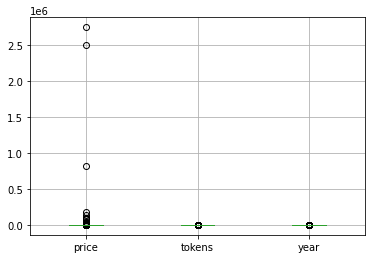

In [ ]:
numeric_col = ['price', 'tokens', 'year'] # I exclude 'media', 'nsfw', 'rights' as they range only in (0,4)
df.boxplot(numeric_col)

In [ ]:
for x in ['price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan

    df.loc[df[x] > max,x] = np.nan

In [ ]:
round(df['price'].mean(), 2)

76.63

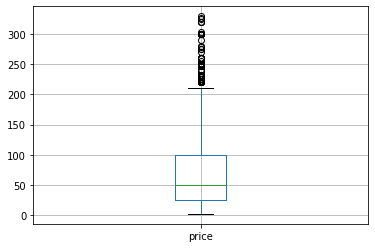

In [ ]:
df.boxplot('price')  #green line corresponds to the mean (76.63)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Predictive/images/price_boxplot.png')

We have a left-tailed distribution of  *price*, which can also be seen by looking at a violin plot.

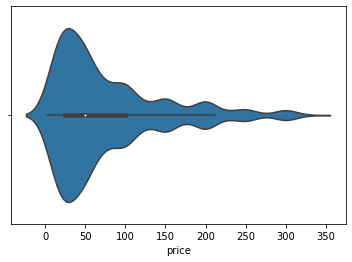

In [ ]:
sns.violinplot(data=df, x='price')

In [ ]:
for x in ['year']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
int(df['year'].mean())

2020

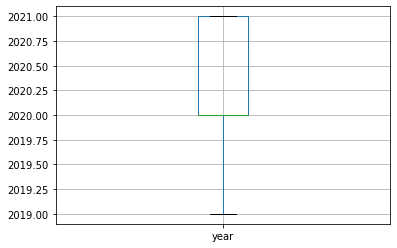

In [ ]:
df.boxplot('year')  #green line corresponds to the mean (2020)

In [ ]:
for x in ['tokens']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
int(df['tokens'].mean())

3

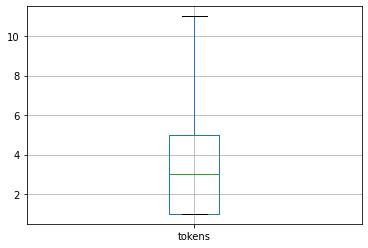

In [ ]:
df.boxplot('tokens') #green line corresponds to the mean (3)

In [ ]:
df.isnull().sum()

creator           0
artwork_name      0
collection        0
art_series        0
price           499
media             0
likes             0
nsfw              0
tokens          142
year            394
rights            0
path              0
dtype: int64

In [ ]:
# using mean to impute the missing values
missing_price = ['price']
for p in missing_price:
    df.loc[df.loc[:,p].isnull(),p]=df.loc[:,p].mean()
    
missing_tokens = ['tokens']
for t in missing_tokens:
    df.loc[df.loc[:,t].isnull(),t]=int(df.loc[:,t].mean())
    
missing_year = ['year']
for y in missing_year:
    df.loc[df.loc[:,y].isnull(),y]=int(df.loc[:,y].mean())

In [ ]:
#verify the changes
df.isnull().sum()

creator         0
artwork_name    0
collection      0
art_series      0
price           0
media           0
likes           0
nsfw            0
tokens          0
year            0
rights          0
path            0
dtype: int64

### 3.3  <a class="anchor" id="3_3"></a> Label encoding

Now let's create a new dataframe for all categorical variables only. Since we will not deal with the actual NFTs, we'll drop the 'path' column.

In [ ]:
encoded_df = df.copy()

le = LabelEncoder()
encoded_df['creator'] = le.fit_transform(encoded_df['creator'])
encoded_df['artwork_name'] = le.fit_transform(encoded_df['artwork_name'])
encoded_df['collection'] = le.fit_transform(encoded_df['collection'])
encoded_df['art_series'] = le.fit_transform(encoded_df['art_series'])
encoded_df = encoded_df.drop(columns = ['path'])
encoded_df.head()

creator  artwork_name  collection  art_series      price  media  likes  \
1290        0          2923          86           0   76.63127      2      0   
1235        0          1316         644           1  100.00000      1      2   
873         0            90         935           2  300.00000      1      0   
2754        1           978         664           6   58.00000      1      0   
3993        1           453        1447          14  110.00000      1      0   

      nsfw  tokens    year  rights  
1290     0     1.0  2021.0       1  
1235     0     1.0  2020.0       3  
873      0     1.0  2020.0       1  
2754     0     5.0  2020.0       1  
3993     0     1.0  2020.0       1

In [ ]:
# Download clean dataframe for EDA
encoded_df.to_csv('clean_data.csv', index = False)

## Chapter 4: <a class="anchor" id="chapter4"></a> Correlation between attributes

In [ ]:
CorrVars = encoded_df.columns
correlation_df = encoded_df[CorrVars].corr().apply(lambda x:round(x,3))

Text(0.5, 1.0, 'Correlation Matrix')

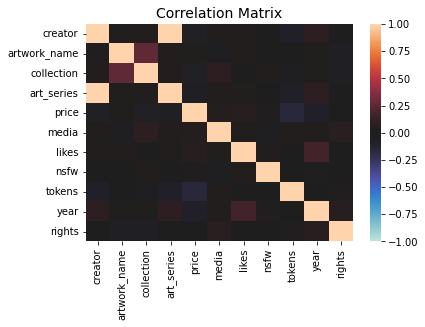

In [ ]:
# Correlation matrix

ax = sns.heatmap(correlation_df,annot=False, vmin=-1, vmax=1, center=0)
ax.set_title("Correlation Matrix", fontsize = 14)

_ = ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right')

plt.savefig('correlation_matrix.png')

In [ ]:
correlation_df['price'].sort_values(ascending=False)

price           1.000
likes           0.055
media           0.045
artwork_name    0.017
nsfw            0.013
rights         -0.005
art_series     -0.052
creator        -0.055
collection     -0.058
year           -0.073
tokens         -0.150
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bb3a4fe10>,
      dtype=object)

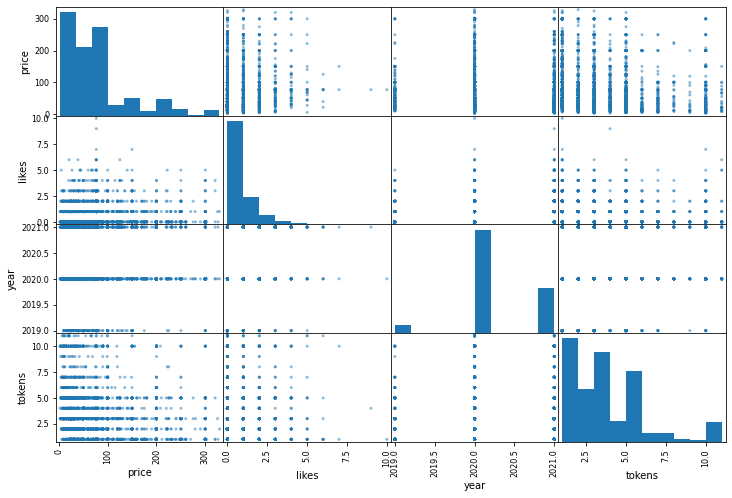

In [ ]:
from pandas.plotting import scatter_matrix

num_attributes = ['price', 'likes', 'year', 'tokens']
scatter_matrix(df[num_attributes], figsize=(12, 8))

plt.savefig('num_scatter_matrix.png')

The most promising attribute to predict the NFT value apart from categorical features is the tokens, so let’s zoom in on their correlation scatterplot.

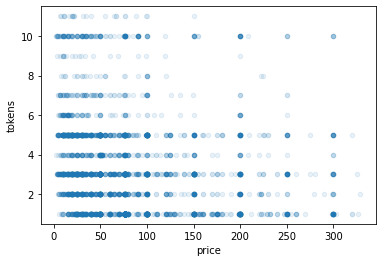

In [ ]:
df.plot(kind="scatter", x="price", y="tokens", alpha=0.1)

If we could draw a line over the area of most blue dots, we can notice a flat exponential distribution curve. It also makes sense in real life: intuitively, the less tokens (i.e. editions) an NFT has, the more value it should have, as it is rarer - again, just like traditional paintings. Although reproduction of an NFT is arguably easier than reproduction of a painting.

## Chapter 5: <a class="anchor" id="chapter5"></a> Preprocessing

### 5.1  <a class="anchor" id="5_1"></a> Generating artwork counts

Below, I created a new variable which simply tells how many NFTs each artist has. I thought of it as NFT price may be linked to frequency of creator’s final artistic output.

In [ ]:
artwork_counts = {}

for creator in encoded_df.creator:
  if creator in artwork_counts:
    artwork_counts[creator] = artwork_counts[creator] + 1
  else:
    artwork_counts[creator] = 1

print(artwork_counts)

{0: 3, 1: 15, 2: 1, 3: 9, 4: 1, 5: 5, 6: 6, 7: 2, 8: 4, 9: 1, 10: 5, 11: 6, 12: 2, 13: 2, 14: 2, 15: 5, 16: 2, 17: 40, 18: 14, 19: 33, 20: 37, 21: 12, 22: 3, 23: 10, 24: 19, 25: 17, 26: 16, 27: 2, 28: 8, 29: 11, 30: 8, 31: 1, 32: 2, 33: 2, 34: 57, 35: 2, 36: 2, 37: 4, 38: 5, 39: 1, 40: 3, 41: 1, 42: 5, 43: 1, 44: 3, 45: 1, 46: 5, 47: 1, 48: 1, 49: 99, 50: 5, 51: 1, 52: 4, 53: 1, 54: 1, 55: 1, 56: 5, 57: 3, 58: 6, 59: 6, 60: 2, 61: 52, 62: 3, 63: 4, 64: 4, 65: 9, 66: 24, 67: 1, 68: 8, 69: 2, 70: 5, 71: 15, 72: 1, 73: 6, 74: 2, 75: 7, 76: 8, 77: 4, 78: 17, 79: 35, 80: 3, 81: 4, 82: 13, 83: 1, 84: 2, 85: 4, 86: 6, 87: 2, 88: 2, 89: 6, 90: 2, 91: 8, 92: 11, 93: 3, 94: 2, 95: 1, 96: 1, 97: 1, 98: 4, 99: 2, 100: 2, 101: 2, 102: 5, 103: 1, 104: 1, 105: 12, 106: 2, 107: 38, 108: 8, 109: 31, 110: 5, 111: 1, 112: 1, 113: 4, 114: 1, 115: 3, 116: 11, 117: 1, 118: 9, 119: 5, 120: 1, 121: 5, 122: 21, 123: 17, 124: 5, 125: 2, 126: 7, 127: 9, 128: 40, 129: 9, 130: 1, 131: 1, 132: 4, 133: 10, 134: 6, 1

In [ ]:
artwork_counts_check = encoded_df['creator'].value_counts().to_dict()
artwork_counts_check == artwork_counts

True

In [ ]:
df_temporary = pd.DataFrame(
    [{"creator": creator, "artwork_counts": artwork_counts} for (creator, artwork_counts) in artwork_counts.items()])
df_temporary.head()
len(df_temporary)

creator  artwork_counts
0        0               3
1        1              15
2        2               1
3        3               9
4        4               1

515

In [ ]:
encoded_df = encoded_df.merge(df_temporary,how='left', left_on='creator', right_on='creator')
encoded_df.head()
len(encoded_df)

creator  artwork_name  collection  art_series      price  media  likes  \
0        0          2923          86           0   76.63127      2      0   
1        0          1316         644           1  100.00000      1      2   
2        0            90         935           2  300.00000      1      0   
3        1           978         664           6   58.00000      1      0   
4        1           453        1447          14  110.00000      1      0   

   nsfw  tokens    year  rights  artwork_counts  
0     0     1.0  2021.0       1               3  
1     0     1.0  2020.0       3               3  
2     0     1.0  2020.0       1               3  
3     0     5.0  2020.0       1              15  
4     0     1.0  2020.0       1              15

4189

### 5.2  <a class="anchor" id="5_2"></a> Feature scaling


"To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model." (Analytics Vidhya, 2020) In retrospect, normalisation might have worked better with the dataset, as outliers have been handled, and data does not seem to follow normal distribution.

In [ ]:
# copy of the dataset
standard_df = encoded_df.copy()

# apply standardization on numerical features
for i in standard_df.columns:
    
    # fit on data columns
    scale = StandardScaler().fit(standard_df[[i]])
    
    # transform the data columns
    standard_df[i] = scale.transform(standard_df[[i]])

In [ ]:
standard_df.head()
len(standard_df)

creator  artwork_name  collection  art_series         price     media  \
0 -1.648310      0.747970   -1.564792   -1.728349  2.196557e-16  0.930965   
1 -1.648310     -0.617647   -0.444816   -1.727508  3.612081e-01 -0.558650   
2 -1.648310     -1.659493    0.139258   -1.726667  3.452588e+00 -0.558650   
3 -1.641749     -0.904877   -0.404673   -1.723305 -2.879816e-01 -0.558650   
4 -1.641749     -1.351019    1.166906   -1.716579  5.157770e-01 -0.558650   

      likes      nsfw    tokens      year    rights  artwork_counts  
0 -0.514096 -0.185947 -0.999888  1.435162 -0.662589       -0.769714  
1  1.624482 -0.185947 -0.999888 -0.429569  1.509231       -0.769714  
2 -0.514096 -0.185947 -0.999888 -0.429569 -0.662589       -0.769714  
3 -0.514096 -0.185947  0.709019 -0.429569 -0.662589       -0.471914  
4 -0.514096 -0.185947 -0.999888 -0.429569 -0.662589       -0.471914

4189

### 5.3  <a class="anchor" id="5_3"></a> Generating price classes 

In [ ]:
all_prices = pd.DataFrame(standard_df, columns = ['price'])
all_prices.head()
len(all_prices)

price
0  2.196557e-16
1  3.612081e-01
2  3.452588e+00
3 -2.879816e-01
4  5.157770e-01

4189

In [ ]:
standard_df['price'].mean() #must be same as mean price of 76.63 in encoded_df

2.024321666766996e-16

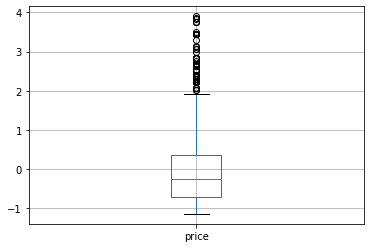

In [ ]:
standard_df.boxplot('price')  #green line corresponds to the abovementioned mean

Now we can create 3 price targets based on the mean price as our threshold.

In [ ]:
#creating a dicionary

price_class = {}
for price in standard_df.price:
  if price < 2.024321666766996e-16:
    price_class[price] = 0 #cheap NFTs
  elif price > 2:
    price_class[price] = 2 #luxury NFTs
  else:
    price_class[price] = 1 #average NFTs

print(price_class)

{2.1965572563550414e-16: 1, 0.36120806824656937: 1, 3.452587581127358: 2, -0.2879816294583962: 0, 0.5157770438906087: 1, -0.25706783432958835: 0, -0.7207747612617066: 0, -0.9989989174209776: 0, -0.5662057856176672: 0, -0.8753437369057461: 0, -0.8135161466481303: 0, -0.5352919904888593: 0, 1.9068978246869637: 1, -0.5816626831820711: 0, 2.679742702907161: 2, 1.8914409271225596: 1, -0.4116368099736278: 0, -0.906257532034554: 0, -1.1071972003718051: 0, -1.0762834052429973: 0, -0.7980592490837264: 0, -0.10249885868554892: 0, -0.5043781953600515: 0, 0.9021994830007074: 1, -1.0595899558734412: 0, 1.1340529464667666: 1, 1.5204753855768651: 1, 0.6703460195346482: 1, 1.288621922110806: 1, 0.05207011695849051: 1, -0.17978334650756864: 0, -0.48892129779564747: 0, -0.025214370863529206: 0, -0.6434902734396869: 0, -1.0299127125497856: 0, 1.2113374342887862: 1, 0.6548891219702443: 1, 0.9794839708227271: 1, -0.1643264489431647: 0, 2.8343116785512006: 2, 0.6239753268414364: 1, -0.9680851222921697: 0, 3

In [ ]:
price_class_df = pd.DataFrame(
    [{"price": price, "price_class": price_class} for (price, price_class) in price_class.items()])
price_class_df.head()
len(price_class_df)

price  price_class
0  2.196557e-16            1
1  3.612081e-01            1
2  3.452588e+00            2
3 -2.879816e-01            0
4  5.157770e-01            1

212

In [ ]:
full_df = standard_df.merge(price_class_df,how='left', left_on='price', right_on='price')
full_df.head()
len(full_df)

creator  artwork_name  collection  art_series         price     media  \
0 -1.648310      0.747970   -1.564792   -1.728349  2.196557e-16  0.930965   
1 -1.648310     -0.617647   -0.444816   -1.727508  3.612081e-01 -0.558650   
2 -1.648310     -1.659493    0.139258   -1.726667  3.452588e+00 -0.558650   
3 -1.641749     -0.904877   -0.404673   -1.723305 -2.879816e-01 -0.558650   
4 -1.641749     -1.351019    1.166906   -1.716579  5.157770e-01 -0.558650   

      likes      nsfw    tokens      year    rights  artwork_counts  \
0 -0.514096 -0.185947 -0.999888  1.435162 -0.662589       -0.769714   
1  1.624482 -0.185947 -0.999888 -0.429569  1.509231       -0.769714   
2 -0.514096 -0.185947 -0.999888 -0.429569 -0.662589       -0.769714   
3 -0.514096 -0.185947  0.709019 -0.429569 -0.662589       -0.471914   
4 -0.514096 -0.185947 -0.999888 -0.429569 -0.662589       -0.471914   

   price_class  
0            1  
1            1  
2            2  
3            0  
4            1

4189

### 5.4  <a class="anchor" id="5_4"></a> Data splitting

Before delving into algorithm training, I will split the dataset into train and test sets to avoid over- and underfitting of our future models.

In [ ]:
# Split dataset into features and labels
X = full_df[['creator', 'artwork_name', 'collection',
           'art_series', 'media', 'likes', 'nsfw',
           'tokens','year', 'rights', 'artwork_counts']]  # Removed original price
y = full_df['price_class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022) # 80% training and 20% test
print(f"No. of training data: {X_train.shape[0]}")
print(f"No. of training targets: {y_train.shape[0]}")
print(f"No. of testing data: {X_test.shape[0]}")
print(f"No. of testing targets: {y_test.shape[0]}")

No. of training data: 3351
No. of training targets: 3351
No. of testing data: 838
No. of testing targets: 838


## Chapter 6: <a class="anchor" id="chapter6"></a> Model selection and training

Let’s consider the nature of the problem more closely. With the new column “price class” generated as a multilabel classification’s target data with coherent structure, it is a supervised learning task, predicting best-fitting price class for the rest of labelled features.

In [ ]:
encoded_df

creator  artwork_name  collection  art_series      price  media  likes  \
0           0          2923          86           0   76.63127      2      0   
1           0          1316         644           1  100.00000      1      2   
2           0            90         935           2  300.00000      1      0   
3           1           978         664           6   58.00000      1      0   
4           1           453        1447          14  110.00000      1      0   
...       ...           ...         ...         ...        ...    ...    ...   
4184      512          2214        1105        4116   50.00000      1      0   
4185      512           448         555        4111   20.00000      1      0   
4186      513          2904        1521        4117  200.00000      2      0   
4187      514           600        1626        4119  211.20000      2      0   
4188      514          3797        1626        4118   99.00000      2      0   

      nsfw  tokens    year  rights  artwork_counts  
0        0     1.0  2021.0       1               3  
1        0     1.0  2020.0       3               3  
2        0     1.0  2020.0       1               3  
3        0     5.0  2020.0       1              15  
4        0     1.0  2020.0       1              15  
...    ...     ...     ...     ...             ...  
4184     0     2.0  2021.0       3              11  
4185     0     3.0  2021.0       1              11  
4186     0    10.0  2020.0       1               1  
4187     0     1.0  2020.0       1               2  
4188     0     1.0  2020.0       1               2  

[4189 rows x 12 columns]

### 6.1  <a class="anchor" id="6_1"></a> Logistic Regression

In [ ]:
#URL: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

# Instantiate the model
random.seed(2022)
log = LogisticRegression()

#Train the model using the training sets
log.fit(X_train,y_train)

#Predict the response for test dataset
log_y_pred=log.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Accuracy of LR is ' + str(round(metrics.accuracy_score(y_test, log_y_pred), 3)*100)+'%')

LogisticRegression()

Accuracy of LR is 61.0%


In [ ]:
# Checking if it works
random_NFT = X_train.loc[0]
log.predict([random_NFT])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

61.0% is a relatively week start but not too bad. It performed the worst overall, making its rank 6/6.

### 6.2  <a class="anchor" id="6_2"></a> KNeighbors Classifier

In [ ]:
#Create KNN Classifier
random.seed(2022)
knn = KNeighborsClassifier(n_neighbors = 3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
knn_y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Accuracy of KNN is ' + str(round(metrics.accuracy_score(y_test, knn_y_pred), 3)*100)+'%')

KNeighborsClassifier(n_neighbors=3)

Accuracy of KNN is 64.1%


Classification rate of 64.1%, is considered as good accuracy. For further evaluation, let’s create a model for a different number of neighbours.

In [ ]:
random.seed(2022)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
print('Accuracy of KNN is ' + str(round(metrics.accuracy_score(y_test, knn_y_pred), 3)*100)+'%')

KNeighborsClassifier(n_neighbors=7)

Accuracy of KNN is 65.2%


In [ ]:
# Checking if it works
knn.predict([random_NFT])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

KNN with 7 neighbours performed 1.1%  better than with 3 neighbours, ranking this model third best overall.

### 6.3  <a class="anchor" id="6_3"></a> Decision Tree

In [ ]:
#URL: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

# Create Decision Tree classifer object
random.seed(2022)
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
dt_y_pred = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Accuracy of DTC is ' + str(round(metrics.accuracy_score(y_test, dt_y_pred), 3)*100)+'%')

Accuracy of DTC is 63.5%


In [ ]:
# Checking if it works
dt.predict([random_NFT])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

Decision Tree Classifier performed almost the same as initial KNN model, yet slightly worse, ranking 4th.


### 6.4  <a class="anchor" id="6_4"></a> Random Forest Classifier

In [ ]:
#URL: https://www.datacamp.com/community/tutorials/random-forests-classifier-python#building

#Create a Gaussian Classifier
random.seed(2022)
rfc = RandomForestClassifier(random_state = 2022)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# prediction on test set
rfc_y_pred=rfc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Accuracy of RFC is ' + str(round(metrics.accuracy_score(y_test, rfc_y_pred), 3)*100)+'%')

RandomForestClassifier(random_state=2022)

Accuracy of RFC is 71.0%


In [ ]:
# Checking if it works
rfc.predict([random_NFT])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

Random Forest performed the best so far, and it is the only model that scored more than 70%.

### 6.5  <a class="anchor" id="6_5"></a>XGBoost

In [ ]:
#URL: https://www.datacamp.com/community/tutorials/xgboost-in-python

#Create a Gaussian Classifier
random.seed(2022)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, booster='gbtree', random_state = 2022)

#Train the model using the training sets y_pred=clf.predict(X_test)
xgb.fit(X_train,y_train)

# prediction on test set
xgb_y_pred=xgb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Accuracy of XGB is ' + str(round(metrics.accuracy_score(y_test, xgb_y_pred), 3)*100)+'%')

XGBClassifier(learning_rate=0.05, objective='multi:softprob', random_state=2022)

Accuracy of XGB is 67.2%


XGBoost is second best model, also making it a good potential learner for future stacking.

### 6.6  <a class="anchor" id="6_6"></a> SVM

In [ ]:
#URL: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

#Create a svm Classifier
random.seed(2022)
svm = svm.SVC(kernel='linear', C=1, gamma=1)

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_y_pred = svm.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print('Accuracy of SVM is ' + str(round(metrics.accuracy_score(y_test, svm_y_pred), 3)*100)+'%')

# Model Precision: what percentage of positive tuples are labeled as such?
#print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
#print("Recall:",metrics.recall_score(y_test, y_pred))

SVC(C=1, gamma=1, kernel='linear')

Accuracy of SVM is 61.9%


In [ ]:
# Checking if it works
svm.predict([random_NFT])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([1])

SVM ranked only 61.9% It ranked only 5th, second to worst model. It is surprising as when we try stacking later in the report, SVM performs as a third best algorithm.

### 6.7  <a class="anchor" id="6_7"></a> Models comparison

Now, let’s compare all those models and their confusion rates, using confusion matrix.

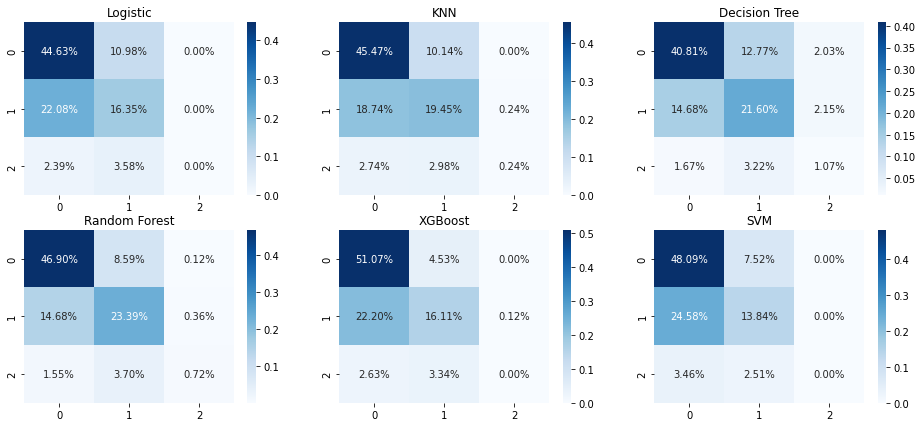

In [ ]:
# Setting figure to compare the confusion matrix of each model based on heatmaps
plt.figure(figsize=(16,7))

# Logistic model confusion matrix heatmap
plt.subplot(2,3,1)
sns.heatmap(confusion_matrix(y_test,log_y_pred)/np.sum(confusion_matrix(y_test,log_y_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('Logistic')

# KNN confusion matrix heatmap
plt.subplot(2,3,2)
sns.heatmap(confusion_matrix(y_test,knn_y_pred)/np.sum(confusion_matrix(y_test,knn_y_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('KNN')

# Decision Tree confusion matrix heatmap
plt.subplot(2,3,3)
sns.heatmap(confusion_matrix(y_test,dt_y_pred)/np.sum(confusion_matrix(y_test,dt_y_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('Decision Tree')

# Random Forest confusion matrix heatmap
plt.subplot(2,3,4)
sns.heatmap(confusion_matrix(y_test,rfc_y_pred)/np.sum(confusion_matrix(y_test,rfc_y_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('Random Forest')

# XGBoost confusion matrix heatmap
plt.subplot(2,3,5)
sns.heatmap(confusion_matrix(y_test,xgb_y_pred)/np.sum(confusion_matrix(y_test,xgb_y_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('XGBoost')

# SVM model confusion matrix heatmap
plt.subplot(2,3,6)
sns.heatmap(confusion_matrix(y_test,svm_y_pred)/np.sum(confusion_matrix(y_test,svm_y_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('SVM')


plt.show();

>log 0.630 (0.020)
>knn 0.651 (0.023)
>dc 0.662 (0.025)
>rfc 0.737 (0.023)
>xgb 0.692 (0.018)
>svm 0.660 (0.021)


{'boxes': [<matplotlib.lines.Line2D at 0x7f8badbd5f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8badbddf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8badbea550>,
 'means': [<matplotlib.lines.Line2D at 0x7f8badbe3fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8badbe3a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8badbdd510>,
  <matplotlib.lines.Line2D at 0x7f8badb49150>]}

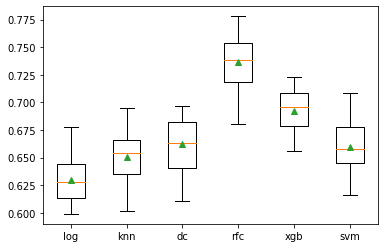

In [ ]:
#URL: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a list of models to evaluate
def get_models():
	models = dict()
	models['log'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['dc'] = DecisionTreeClassifier()
	models['rfc'] = RandomForestClassifier()
	models['xgb'] = XGBClassifier()
	models['svm'] = SVC()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Here we have 6 different algorithms that perform well, presumably in different ways on this dataset. Random Forests Classicfier works the best by far.

## Chapter 7: <a class="anchor" id="chapter7"></a> Cross-validation

In [ ]:
rfc_cv = cross_val_score(rfc, X_train, y_train, cv=10, scoring="accuracy")
print('RFC accuracy score is ' + str(round(rfc_cv[1],3)*100) + '%')

knn_cv = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
print('KNN accuracy score is ' + str(round(knn_cv[1],3)*100) + '%')

dt_cv = cross_val_score(dt, X_train, y_train, cv=10, scoring="accuracy")
print('DTC accuracy score is ' + str(round(dt_cv[1],3)*100) + '%')

xgb_cv = cross_val_score(xgb, X_train, y_train, cv=10, scoring="accuracy")
print('XGB accuracy score is ' + str(round(xgb_cv[1],3)*100) + '%')

RFC accuracy score is 74.0%
KNN accuracy score is 63.9%
DTC accuracy score is 67.80000000000001%
XGB accuracy score is 64.5%


Random Forest is still the best but the change is that decision tree classifier in fact is more precise on test data, than any other picked models.

## Chapter 8: <a class="anchor" id="chapter8"></a> Fine-tuning

After analysis of different models, Random Forest Classifier is the best performing model based on the best accuracy scores. In this section, hyperparameter tuning is performed to optimise hyperparamerters towards a higher recall.

 ### 8.1  <a class="anchor" id="8_1"></a>Hyperparameters

First, feature importance graphs is plotted for the model.


In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

art_series        0.182349
artwork_name      0.169848
collection        0.146580
artwork_counts    0.146250
tokens            0.114416
creator           0.111679
likes             0.040146
media             0.032374
year              0.026701
rights            0.022045
nsfw              0.007611
dtype: float64

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


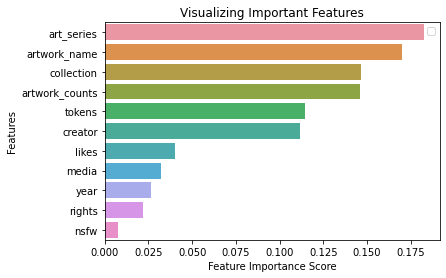

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

To identify the optimal number of best features the model should have, let’s plot an ROC curve, used to choose the most appropriate cut-off for a test. “The best cut-off has the highest true positive rate together with the lowest false positive rate.”  (Ekelund, 2011)

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

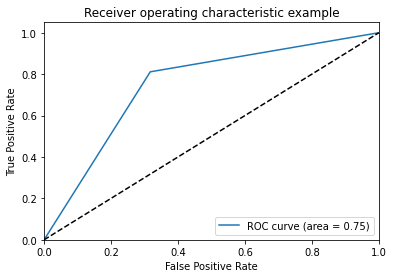

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

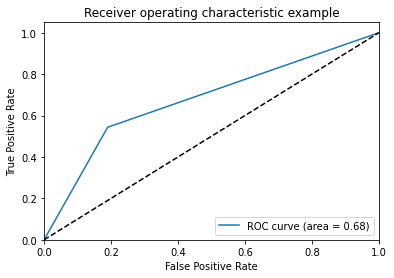

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

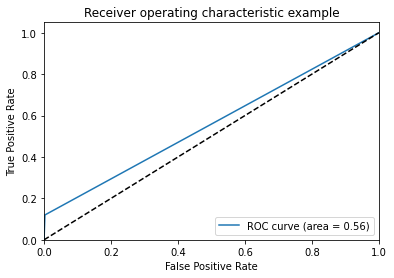

In [ ]:
#URL: https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=2022)

random.seed(2022)
#rfc = RandomForestClassifier(n_estimators=100)
# classifier
rfc_tuned = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
y_score = rfc_tuned.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Generating the Model on Selected Features
random.seed(2022)
rfc = RandomForestClassifier(n_estimators=100)

X = full_df[['art_series', 'artwork_name', 'collection',
             'artwork_counts', 'tokens',  'creator',
             'likes', 'media', 'year', 'rights', 'nsfw']]
y = full_df['price_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy of RFC with all features is ' + str(round(metrics.accuracy_score(y_test, y_pred), 3)*100)+'%')

RandomForestClassifier()

Accuracy of RFC with all features is 71.6%


In [ ]:
# Generating the Model on Selected Features
X = full_df[['art_series', 'artwork_name', 'collection',
             'artwork_counts', 'tokens',  'creator',
             'likes', 'media', 'year', 'rights']]
y = full_df['price_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy of RFC with 1 feature dropped is ' + str(round(metrics.accuracy_score(y_test, y_pred), 3)*100)+'%')

RandomForestClassifier()

Accuracy of RFC with 1 feature dropped is 70.89999999999999%


In [ ]:
# Generating the Model on Selected Features
X = full_df[['art_series', 'artwork_name', 'collection',
             'artwork_counts', 'tokens',  'creator',
             'likes', 'media', 'year']]
y = full_df['price_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy of RFC with 2 feature dropped is ' + str(round(metrics.accuracy_score(y_test, y_pred), 3)*100)+'%')

RandomForestClassifier()

Accuracy of RFC with 2 feature dropped is 70.8%


In [ ]:
# Generating the Model on Selected Features
X = full_df[['art_series', 'artwork_name', 'collection',
             'artwork_counts', 'tokens',  'creator',
             'likes', 'media']]
y = full_df['price_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy of RFC with 3 feature dropped is ' + str(round(metrics.accuracy_score(y_test, y_pred), 3)*100)+'%')

RandomForestClassifier()

Accuracy of RFC with 3 feature dropped is 71.5%


In [ ]:
# Generating the Model on Selected Features
X = full_df[['art_series', 'artwork_name', 'collection',
             'artwork_counts', 'tokens',  'creator',
             'likes']]
y = full_df['price_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy of RFC with 4 feature dropped is ' + str(round(metrics.accuracy_score(y_test, y_pred), 3)*100)+'%')

RandomForestClassifier()

Accuracy of RFC with 4 feature dropped is 71.2%


### Grid search

In [ ]:
# Code Retrieved from https://towardsdatascience.com/ 􏰀→hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 5000, num = 10)]
# Number of features to consider at every split max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 15, num = 11)] max_depth.append(None)
# Minimum number of samples required to split a node min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
 46
                'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

### 8.2 <a class="anchor" id="8_2"></a> Ensemble learning

In [ ]:
from sklearn.ensemble import VotingClassifier

#RFC accuracy score is 74.0%
#DTC accuracy score is 67.80000000000001%
#XGB accuracy score is 65.4%
#KNN accuracy score is 63.9%

rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

voting_clf = VotingClassifier(
    estimators=[('rfc', rfc), ('dt', dt), ('xgb', xgb)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgb', XGBClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (rfc, dt, xgb, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier()

RandomForestClassifier 0.7231503579952268


DecisionTreeClassifier()

DecisionTreeClassifier 0.6229116945107399


XGBClassifier(objective='multi:softprob')

XGBClassifier 0.6873508353221957


VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgb',
                              XGBClassifier(objective='multi:softprob'))])

VotingClassifier 0.7028639618138425


### Bagging

In [ ]:
#URL: https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch07.html#idm45022162013000
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [ ]:
bag_dt = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_dt.fit(X_train, y_train)
bag_dt.oob_score_

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

0.7209788122948374

### Stacking

Let’s try to combine the initial 6 models into a single ensemble model using stacking. We can use Random Forst model to learn how to best combine the predictions from each of the separate 6 models. 

>log 0.637 (0.018)
>knn 0.634 (0.018)
>dc 0.672 (0.024)
>rfc 0.731 (0.019)
>xgb 0.690 (0.018)
>svm 0.660 (0.019)
>stacking 0.587 (0.036)


{'boxes': [<matplotlib.lines.Line2D at 0x7eff0559d410>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff0532fc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff0526cfd0>,
 'means': [<matplotlib.lines.Line2D at 0x7eff05344a50>,
 'medians': [<matplotlib.lines.Line2D at 0x7eff05344850>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff0532f550>,
  <matplotlib.lines.Line2D at 0x7eff055a8090>]}

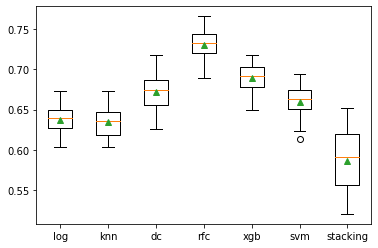

In [ ]:
#URL: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('log', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('dc', DecisionTreeClassifier()))
	level0.append(('rfc', RandomForestClassifier()))
	level0.append(('xgb', XGBClassifier()))
	level0.append(('svm', SVC()))

	# define meta learner model
	level1 = RandomForestClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['log'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['dc'] = DecisionTreeClassifier()
	models['rfc'] = RandomForestClassifier()
	models['xgb'] = XGBClassifier()
	models['svm'] = SVC()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Doesn't look good - our overall stacking model is dragged down. Let's try first to change the number of models to our 2 best ones, and then change the meta learner model.

>rfc 0.729 (0.019)
>xgb 0.690 (0.018)
>stacking 0.529 (0.042)


{'boxes': [<matplotlib.lines.Line2D at 0x7eff053cf950>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff053d9990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff053d0ed0>,
 'means': [<matplotlib.lines.Line2D at 0x7eff053d09d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7eff053d0490>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff053cfed0>,
  <matplotlib.lines.Line2D at 0x7eff054859d0>]}

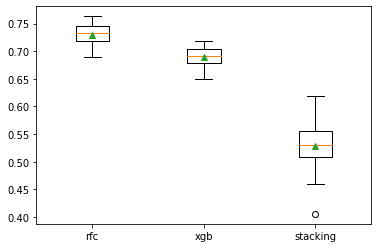

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('rfc', RandomForestClassifier()))
	level0.append(('xgb', XGBClassifier()))

	# define meta learner model
	level1 = RandomForestClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['rfc'] = RandomForestClassifier()
	models['xgb'] = XGBClassifier()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>rfc 0.732 (0.019)
>xgb 0.690 (0.018)
>svm 0.660 (0.019)
>stacking 0.660 (0.019)


{'boxes': [<matplotlib.lines.Line2D at 0x7eff04830d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff04834e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff048433d0>,
 'means': [<matplotlib.lines.Line2D at 0x7eff0483be50>,
 'medians': [<matplotlib.lines.Line2D at 0x7eff0483b910>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff04834390>,
  <matplotlib.lines.Line2D at 0x7eff047f1990>]}

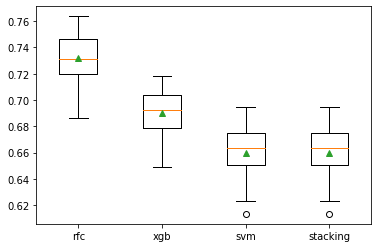

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('svm', SVC()))
	level0.append(('rfc', RandomForestClassifier()))
	level0.append(('xgb', XGBClassifier()))

	# define meta learner model
	level1 = SVC()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['rfc'] = RandomForestClassifier()
	models['xgb'] = XGBClassifier()
	models['svm'] = SVC()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Even if we chose a stacking ensemble as our final model, we could fit and use it to make predictions on new data just like any other model. First, the stacking ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.
The example below demonstrates this on our classification dataset. However, this is not our final chosen model due to the low accuracy score.

In [ ]:
# define the base models
level0 = list()
level0.append(('rfc', RandomForestClassifier()))
level0.append(('xgb', XGBClassifier()))

# define meta learner model
level1 = RandomForestClassifier()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(X, y)

# make a prediction for one example
data = random_NFT
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

Ensemble learning did not quite work for the dataset, making us stop with hypertuned of Random Forest Classifier with final accuracy score of 71.4%.

## Chapter 9: <a class="anchor" id="chapter9"></a> Further work

 ### 9.1  <a class="anchor" id="9_1"></a> Segmenation clustering on colours

Given more time and resources like bigger Google Drive memory and faster GPU, I would perform clustering on the dataset’s images. The way I’d start approaching it is in the code below. I would create a separate column with the dominant colour of the NFT, and cluster them into RGB channels. A model which also contains the channel would be more informative both for collectors that want to spiculate the next hottest NFT in Hives value and give more autonomy to creators who would hope to set a price in a higher class ("2").

In [ ]:
#define values
values = [2, 3]

#drop rows that contain any value in the list
df = df[df.media.isin(values) == False]

In [ ]:
# Changing 'path' name to work in Google Collab.
# Don't run this cell if viewing in Faculty or locally.

df['path'] = df['path'].str[1:]
df['path'] ='/content/drive/MyDrive/Colab Notebooks/Predictive' + df['path'].astype(str)
df['path'].sample(n=1).iloc[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'/content/drive/MyDrive/Colab Notebooks/Predictive/dataset/image/QmTZoPGzVRBb7zJaTsprCkKKxkkm63k7g6PgkBUHEKc8h7.png'

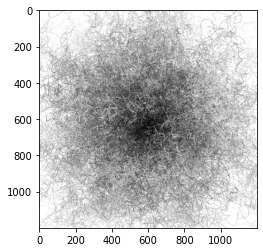

In [ ]:
images = []
for x in df.path[:10]:
    x = cv2.imread(x)
    images.append(x)
    
plt.imshow(images[0])

 ### 9.2  <a class="anchor" id="9_2"></a> Other

Transformation pipeline would also be useful to do all at once: the data cleaning, adding new features, transforming categorical data by encoding, processing numerical and categorical data separately. Additionally, the performance could have been improved through the Grid Search iterations.

## Chapter 10: <a class="anchor" id="chapter10"></a> Conclusion

For this report, a secondary dataset is used to investigate the factors that digital artists of NFT Showroom consider when defining a selling price of their NFT.  We gathered insights about the features through data visualizations first, making initial observations in relationships, which were not as accurate to the naked eye. For example, we would have expected a year of NFT release and number of its editions (tokens) to be very deterministic for a price, whilst after label encoding of categorical columns, feature importance revealed only 9th and 5th order of importance respectfully.

Six machine learning models are tested and Random Forest Classifier is chosen. He fine-tuned a model that can be used both by data-savvy NFT creators and collectors willing to invest into highly valued artworks. For example, it is suggested that apart from unique names, artwork count is also a very important consideration when determining a price.

Regarding limitations, as there were not many explanatory variables, the model may have suffered from the reduced precision of the price predictions. More quantitative rather than categorical data would give more informative insights into the problem, which might be improved with a more consistent NFT selling process in the future.


## Chapter 11: <a class="anchor" id="chapter11"></a> References

Analytics Vidhya. (2020). *Feature Scaling | Standardization Vs Normalization.* [online] Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/ [Accessed 10 Mar. 2022].

CoinGecko (n.d.). *Hive Price Today, Chart, Market Cap & News.* [online] CoinGecko. Available at: https://www.coingecko.com/en/coins/hive [Accessed 12 Feb. 2022].

De Haan, A. (2021). *NFT Art Collection 2021. *[online] kaggle.com. Available at: https://www.kaggle.com/vepnar/nft-art-dataset.

Géron, A. (2019). *Classification - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition *[Book]. [online] www.oreilly.com. Available at: https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch03.html [Accessed 11 Mar. 2022]

Google Trends (n.d.). *Google Trends - NFT. *[online] Google Trends. Available at: https://trends.google.com/trends/explore?date=all&q=nft [Accessed 21 Feb. 2022].

MonkeyLearn Blog. (2020). *Classification Algorithms in Machine Learning: How They Work. *[online] Available at: https://monkeylearn.com/blog/classification-algorithms/.

Sharma, R. (2021). *Non-Fungible Token Definition: Understanding NFTs.* [online] Investopedia. Available at: https://www.investopedia.com/non-fungible-tokens-nft-5115211 [Accessed 21 Feb. 2022].

## Chapter 12: <a class="anchor" id="chapter12"></a> Word count

When calculating the final word count, I hashtaged out all markdown cells not to be considered by temporarily converting them into code cells, like table of contents, references, subheadings and the current paragraph. I ran the code after convering all cells back to markdown, hence why, it gives a much larger a word count. When they all are converted into code cells, the word count is indeed 1938 words.

In [ ]:
#word count code
def nb_word_count(nb_path):
    with io.open(nb_path, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')
        word_count = 0
        for cell in nb.worksheets[0].cells:
            if cell.cell_type == "markdown":
                word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    return word_count
nb_word_count("/content/drive/MyDrive/Colab Notebooks/Predictive/Report.ipynb")

2291